In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
from collections import Counter

# 1.Loading Data 

In [7]:
train_df =pd.read_csv('housing_dataset/train.csv')

In [8]:
train_df.shape

(1460, 81)

#  2.Non-categorical  Features in dataset

In [9]:
numerical_features = train_df.select_dtypes(include=['int','float']).columns

In [10]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
train_df.select_dtypes(include=['float']).columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

   #  3.Categorical Features in dataset  

In [12]:
categorical_feature = train_df.select_dtypes(include=['object']).columns

In [13]:
categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#  4.Finding Outlier 

In [14]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
def outlier(df,n,features):
    outlier_indices=[]
    
    for col in features:
        #1st quartile(25%)
        Q1 = np.percentile(df[col],25)
        #3rd quartile(75%)
        Q3 = np.percentile(df[col],75)
        #InterQuatile Range
        IQR=Q3-Q1
        
        outlier_border =IQR*1.5
        #determinining outlier columns
        outlier_column_list =df[(df[col]<Q1-outlier_border)|(df[col]>Q3+outlier_border)].index
        outlier_indices.extend(outlier_column_list)
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outlier

"From the use an array of non categorical feature columns" 

In [17]:
non_categorical_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 
                          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                          '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                          'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 
                          'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch',
                          '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [18]:
outlier_to_drop = outlier(train_df,5,non_categorical_features)

/home/anish/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [19]:
outlier_to_drop

[635, 185, 197, 523, 691, 769, 1230, 1298, 1182, 1386, 496, 803, 1350]

In [20]:
train_df.loc[outlier_to_drop]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
769    770          60       RL         47.0    53504   Pave   NaN      IR2   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
496    497          20       RL          NaN    12692   Pave   NaN      IR1   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
635          Bnk    AllPub    ...            0    NaN    NaN         NaN   
185          Lvl    AllPub    ...            0    NaN  GdPrv         NaN   
197          Lvl    AllPub    ...          512     Ex  GdPrv         NaN   
523          Bnk    AllPub    ...            0    NaN    NaN         NaN   
691          Lvl    AllPub    ...            0    NaN    NaN         NaN   
769          HLS    AllPub    ...            0    NaN    NaN         NaN   
1230         Lvl    AllPub    ...            0    NaN    NaN        Gar2   
1298         Bnk    AllPub    ...          480     Gd    NaN         NaN   
1182         Lvl    AllPub    ...          555     Ex  MnPrv         NaN   
1386         Lvl    AllPub    ...          519     Fa  MnPrv        TenC   
496          Lvl    AllPub    ...            0    NaN    NaN         NaN   
803          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1350         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
635        0      3   2007        WD        Abnorml     200000  
185        0      6   2006        WD         Normal     475000  
197        0      3   2006        WD        Abnorml     235000  
523        0     10   2007       New        Partial     184750  
691        0      1   2007        WD         Normal     755000  
769        0      6   2010        WD         Normal     538000  
1230    8300      8   2007        WD         Normal     190000  
1298       0      1   2008       New        Partial     160000  
1182       0      7   2007        WD        Abnorml     745000  
1386    2000      7   2006        WD         Normal     250000  
496        0      5   2007        WD         Normal     430000  
803        0      1   2009       New        Partial     582933  
1350       0      8   2009        WD         Normal     200000  

[13 rows x 81 columns]

# 5. Finding Null Values and plotting the by features 

In [21]:
train_df.fillna(np.nan)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [22]:
def null_count(df):
    missing_data = df.isnull().sum()
    missing_data =missing_data[missing_data>0].sort_values(ascending = False)
    percentage_of_null =missing_data*100/len(df)
    features_index = missing_data.index
    values =list(missing_data)
    percent_values = list(percentage_of_null)
    val_df =pd.DataFrame(data=values,index=features_index,columns=['null_count'])
    val_df['Null_percent'] = percent_values
    plt.figure(figsize=(18,10))
    sns.barplot(x=features_index,y=val_df['null_count'])
    plt.title("Total missing value by columns")
    plt.xticks(rotation=90)
    return plt,val_df 

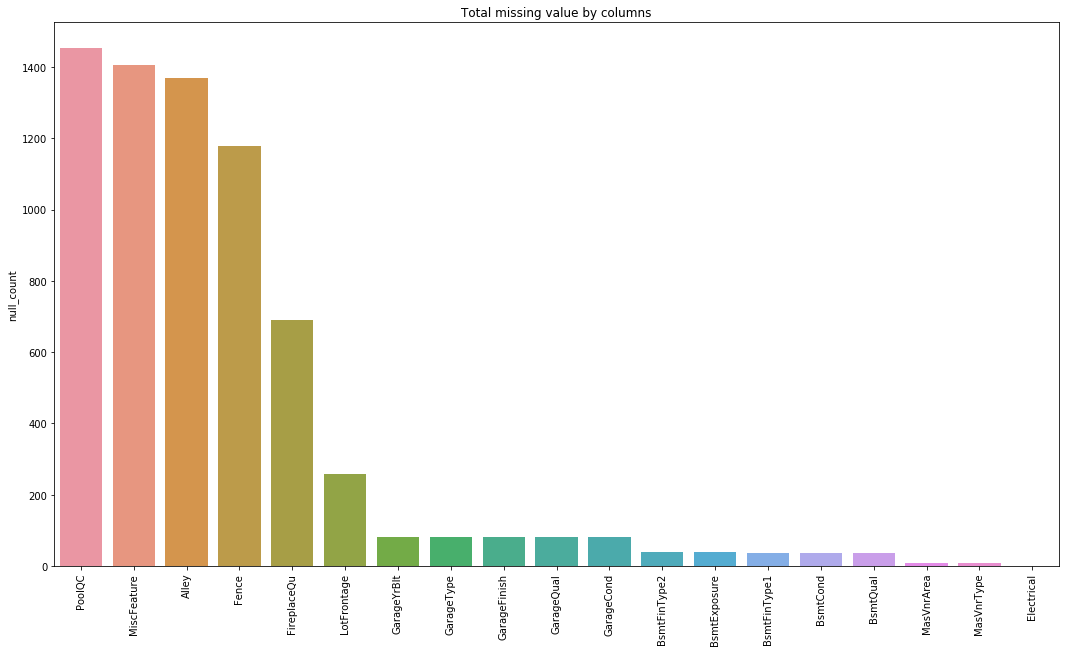

In [23]:
plt,val =null_count(train_df)

In [24]:
val

null_count  Null_percent
PoolQC              1453     99.520548
MiscFeature         1406     96.301370
Alley               1369     93.767123
Fence               1179     80.753425
FireplaceQu          690     47.260274
LotFrontage          259     17.739726
GarageYrBlt           81      5.547945
GarageType            81      5.547945
GarageFinish          81      5.547945
GarageQual            81      5.547945
GarageCond            81      5.547945
BsmtFinType2          38      2.602740
BsmtExposure          38      2.602740
BsmtFinType1          37      2.534247
BsmtCond              37      2.534247
BsmtQual              37      2.534247
MasVnrArea             8      0.547945
MasVnrType             8      0.547945
Electrical             1      0.068493

As we see from the figurePoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage has more missing values where as 
GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQua,MasVnrArea,MasVnrType,Electrical	

# 6. Filling the missing value where no available is kept as  blank or void 

In [25]:
train_df['PoolQC'].fillna(value='NA',inplace=True)
train_df['MiscFeature'].fillna(value='NA',inplace=True)
train_df['Alley'].fillna(value='NA',inplace=True)
train_df['Fence'].fillna(value='NA',inplace=True)
train_df['FireplaceQu'].fillna(value='NA',inplace=True)
train_df['GarageQual'].fillna(value='NA',inplace=True)
train_df['GarageCond'].fillna(value='NA',inplace=True)
train_df['GarageFinish'].fillna(value='NA',inplace=True)
train_df['GarageType'].fillna(value='NA',inplace=True)
train_df['BsmtExposure'].fillna(value='NA',inplace=True)
train_df['BsmtCond'].fillna(value='NA',inplace=True)
train_df['BsmtQual'].fillna(value='NA',inplace=True)
train_df['BsmtFinType2'].fillna(value='NA',inplace=True)
train_df['BsmtFinType1'].fillna(value='NA',inplace=True)
train_df['MasVnrType'].fillna(value='None',inplace=True)

# 7. Filling Categorical Value with the maximum occuring type 

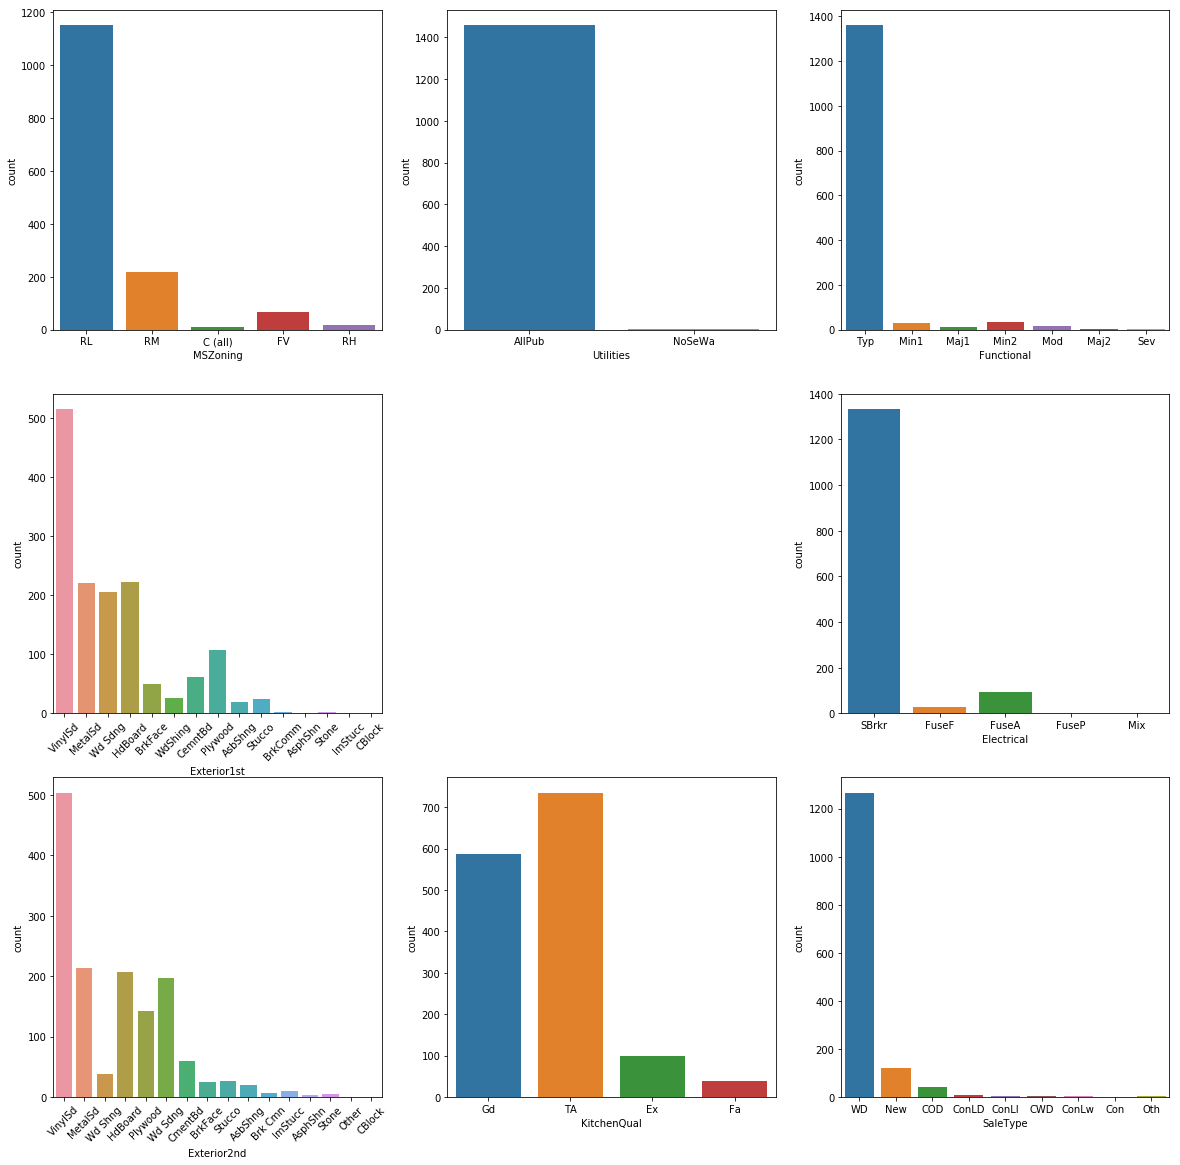

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.countplot(x='MSZoning',data=train_df)
plt.subplot(3,3,2)
sns.countplot(x='Utilities',data=train_df)
plt.subplot(3,3,3)
sns.countplot(x='Functional',data=train_df)
plt.subplot(3,3,4)
sns.countplot(x='Exterior1st',data=train_df)
plt.xticks(rotation=45)
plt.subplot(3,3,6)
sns.countplot(x='Electrical',data=train_df)
plt.subplot(3,3,7)
sns.countplot(x='Exterior2nd',data=train_df)
plt.xticks(rotation=45)
plt.subplot(3,3,8)
sns.countplot(x='KitchenQual',data=train_df)
plt.subplot(3,3,9)
sns.countplot(x='SaleType',data=train_df)

# " From the above figure we can estimate what can be filled  in the voids"
    1. Filling RL in MSZoning
    2. Filling AllPub in Utilies
    3. Filling Typ in Functional
    4. Filling VinylSd in Exterior1st
    5. Filling SBrKr in Electircal
    6. Filling VinylSd in Exterior2nd
    7. Filling TA in KitchenQual
    8. Filling WD in SaleType

In [27]:
train_df['MSZoning'].fillna(value='RL',inplace=True)
train_df['Utilities'].fillna(value='AllPub',inplace =True)
train_df['Functional'].fillna(value='Typ',inplace= True)
train_df['Exterior1st'].fillna(value='VinylSd',inplace=True)
train_df['Electrical'].fillna(value='SBrKr',inplace=True)
train_df['Exterior2nd'].fillna(value='VinylSd',inplace=True)
train_df['KitchenQual'].fillna(value='TA',inplace=True)
train_df['SaleType'].fillna(value='WD',inplace=True)

# 8.Filling remaining Null value 

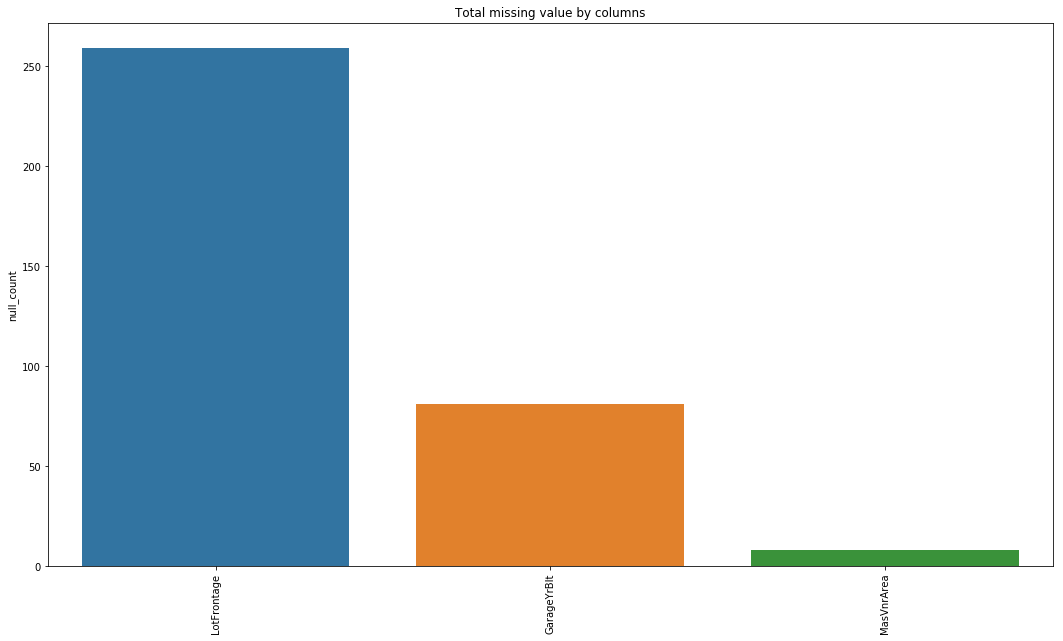

In [28]:
plt,val = null_count(train_df)

In [29]:
val

null_count  Null_percent
LotFrontage         259     17.739726
GarageYrBlt          81      5.547945
MasVnrArea            8      0.547945

In [30]:
train_df[['MasVnrType','MasVnrArea']].loc[train_df['MasVnrArea'].isnull()]

MasVnrType  MasVnrArea
234        None         NaN
529        None         NaN
650        None         NaN
936        None         NaN
973        None         NaN
977        None         NaN
1243       None         NaN
1278       None         NaN

From Above we can conclude that since MasVnrType(Masonry veneer type) is None Hence all 23 blank in MasVnrArea should be 0.

In [32]:
train_df['MasVnrArea'].fillna(value=0,inplace=True)

In [33]:
train_df['GarageYrBlt'].fillna(value=train_df['GarageYrBlt'].median(),inplace=True)

In [34]:
train_df['LotFrontage'].fillna(value=train_df['LotFrontage'].median(),inplace=True)

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.882876
Kurtosis: 6.536282


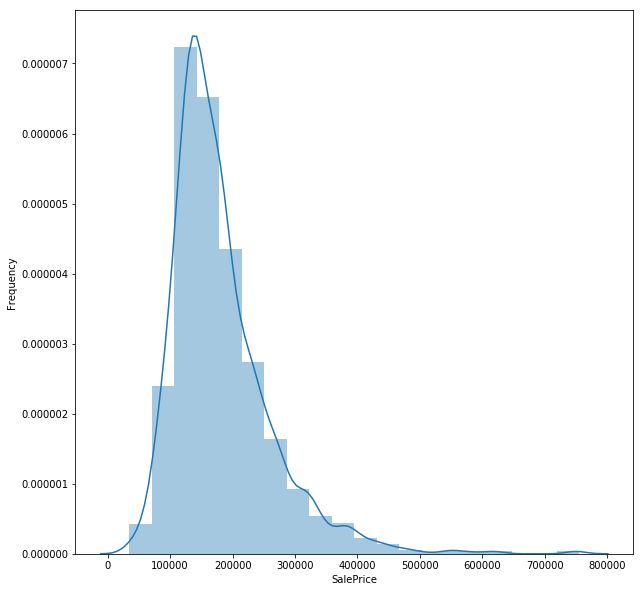

In [35]:
plt.figure(figsize=(10,10))
sns.distplot(train_df['SalePrice'],bins=20);
plt.ylabel("Frequency")
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

# 8.Making Saleprice into Logarithamic value to decrease skewness and kurtosis

In [36]:
train_df['Log_SalePrice'] = np.log(train_df['SalePrice'])

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.882876
Kurtosis: 6.536282


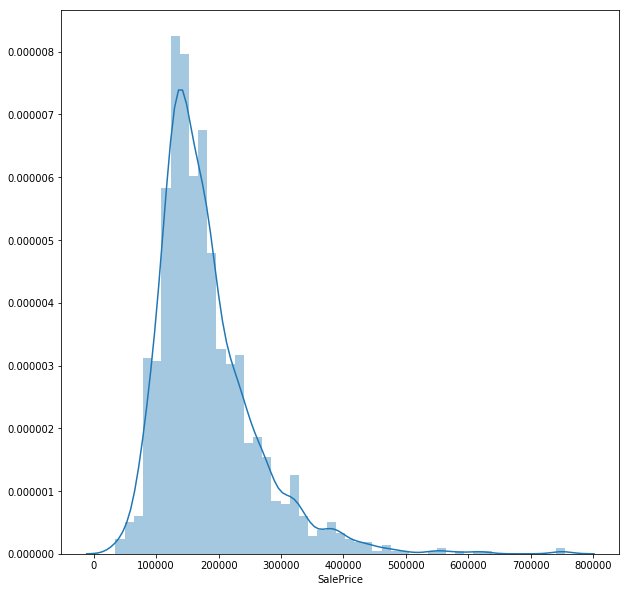

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(train_df['SalePrice']);
# skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())


/home/anish/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


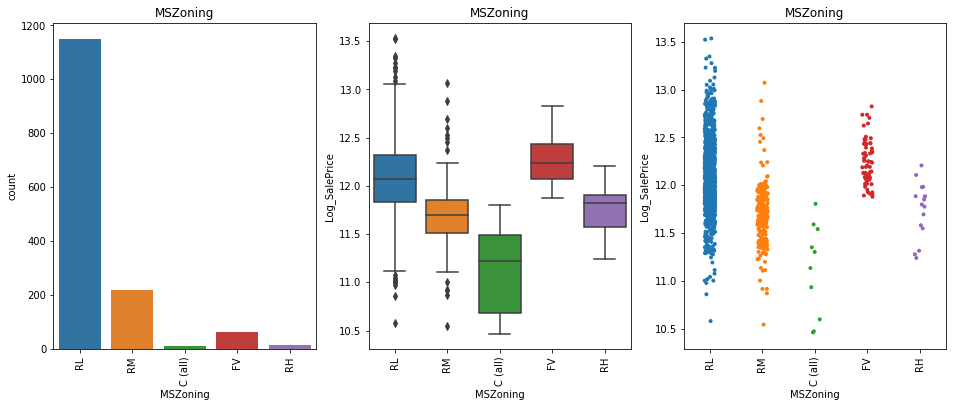

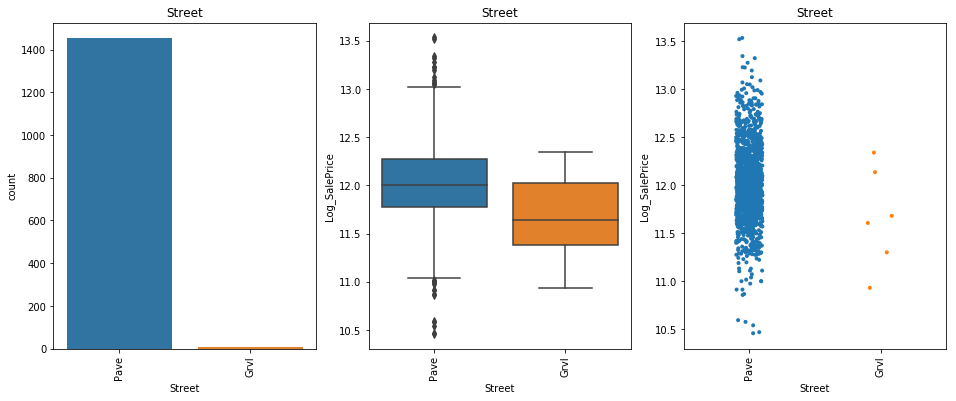

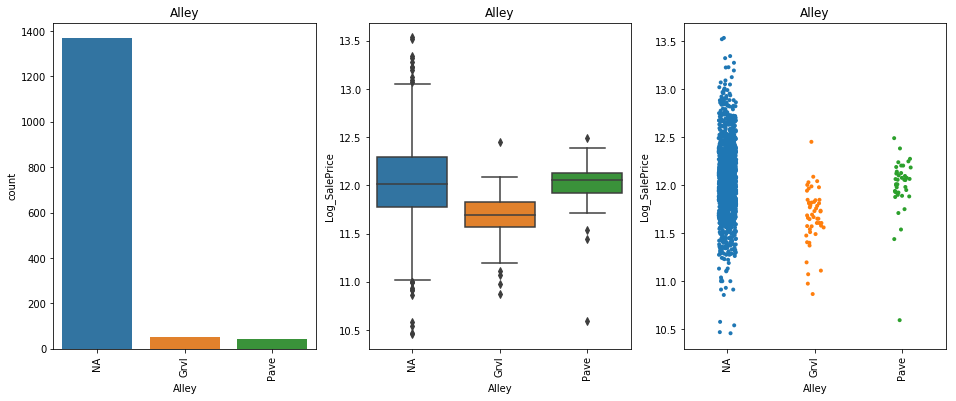

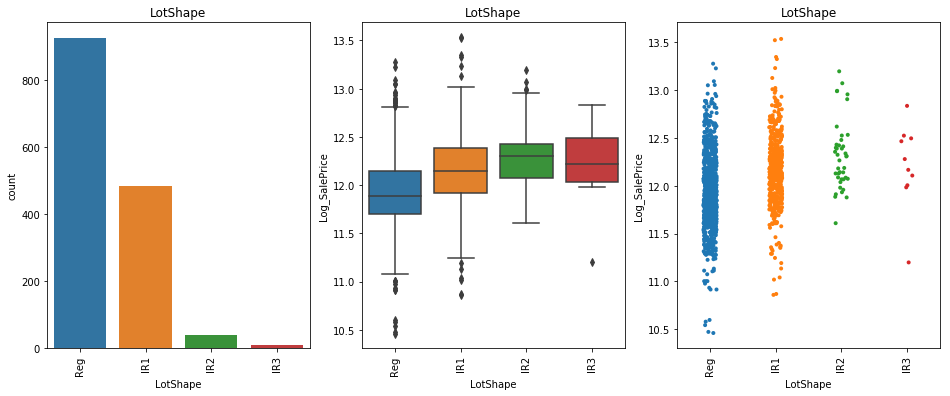

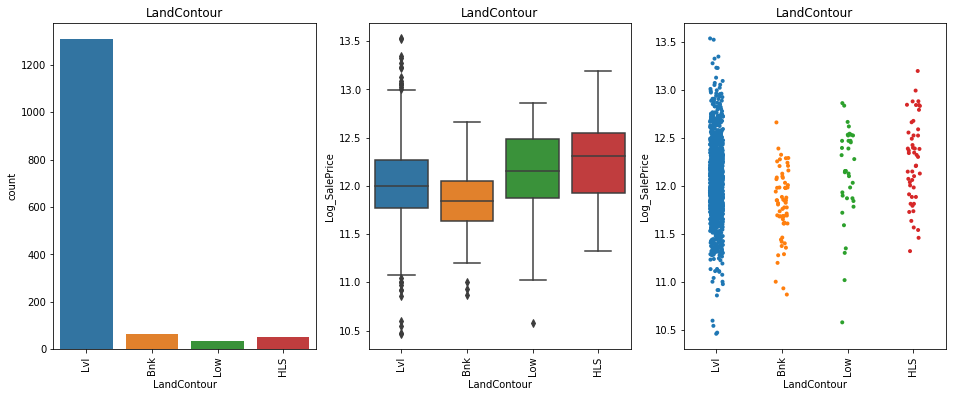

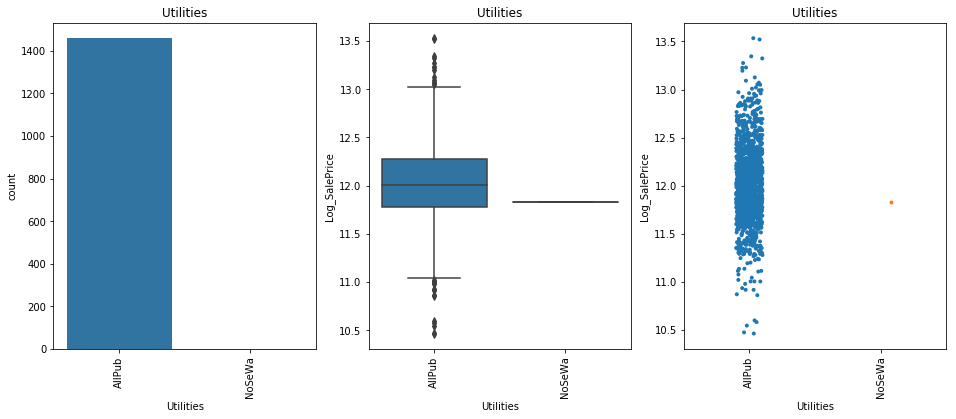

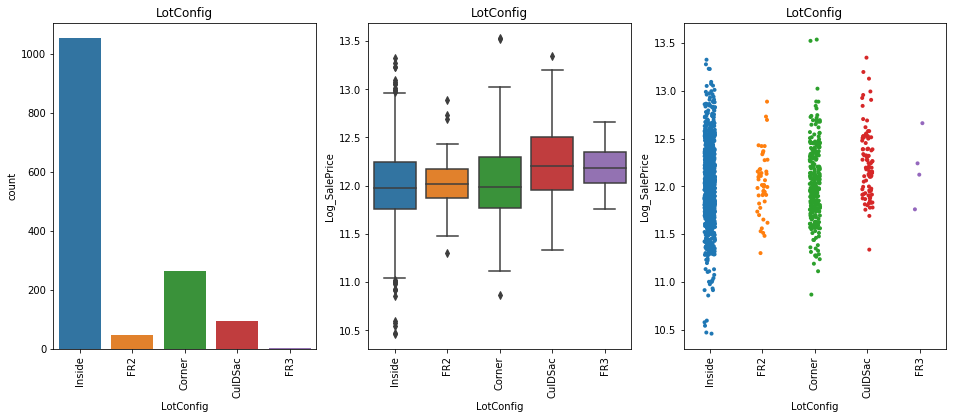

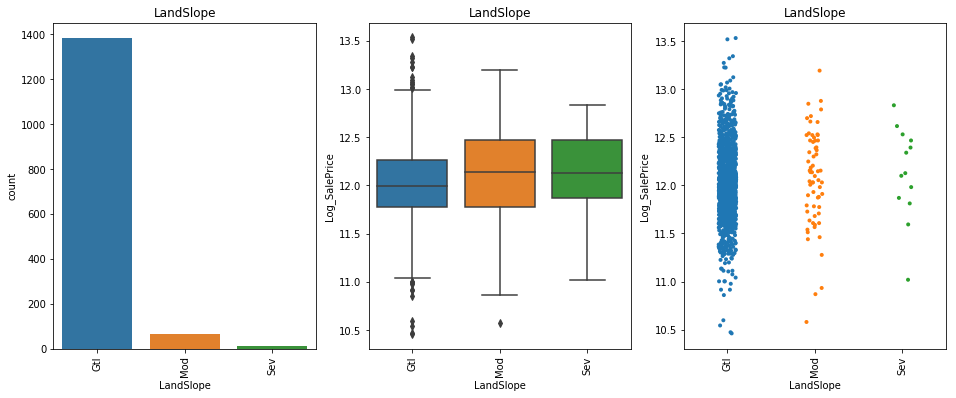

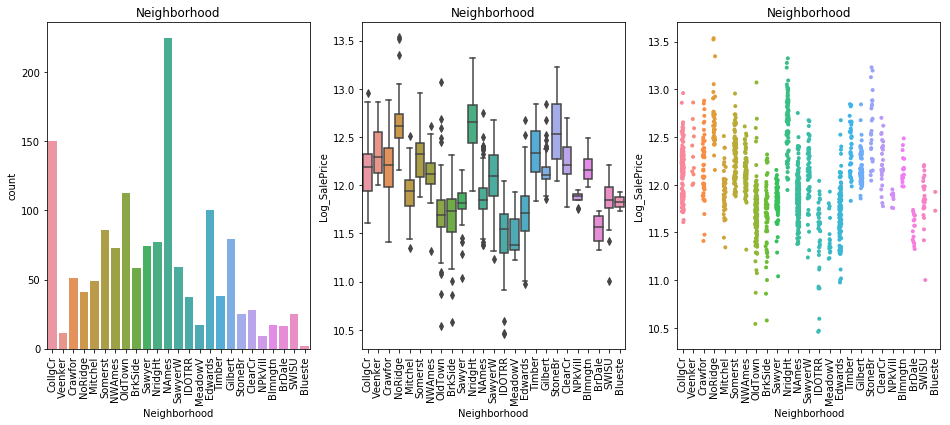

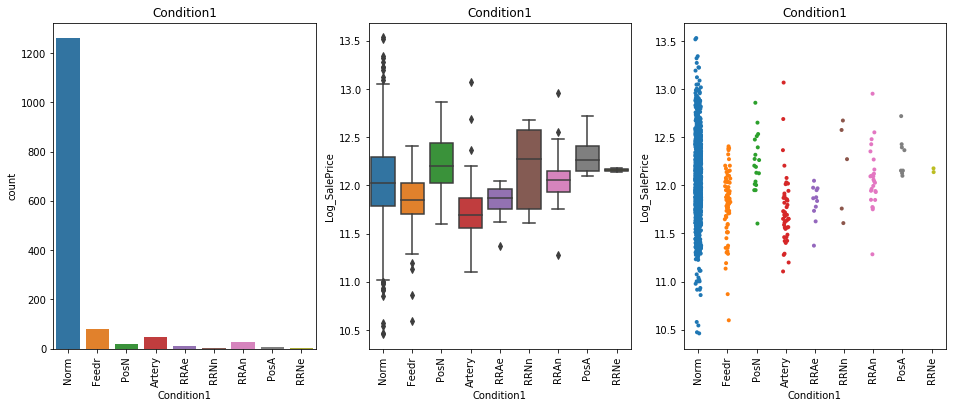

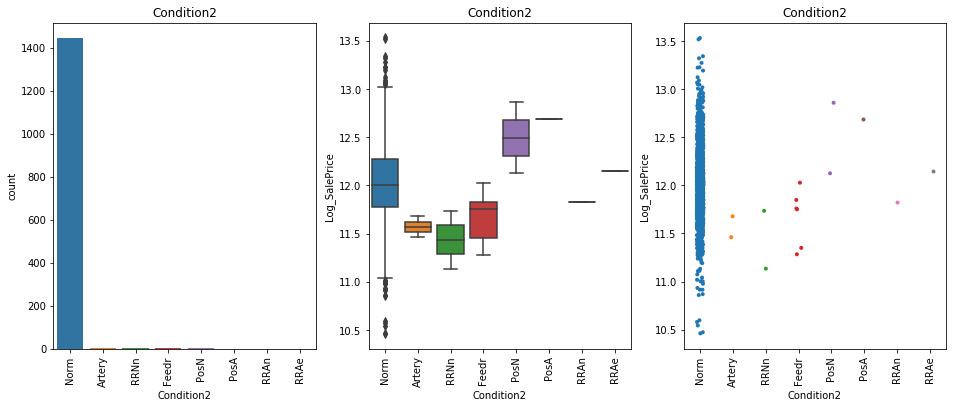

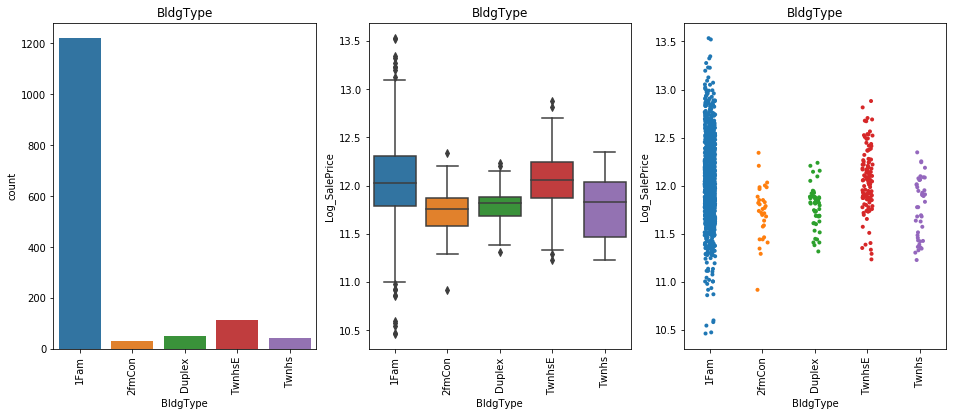

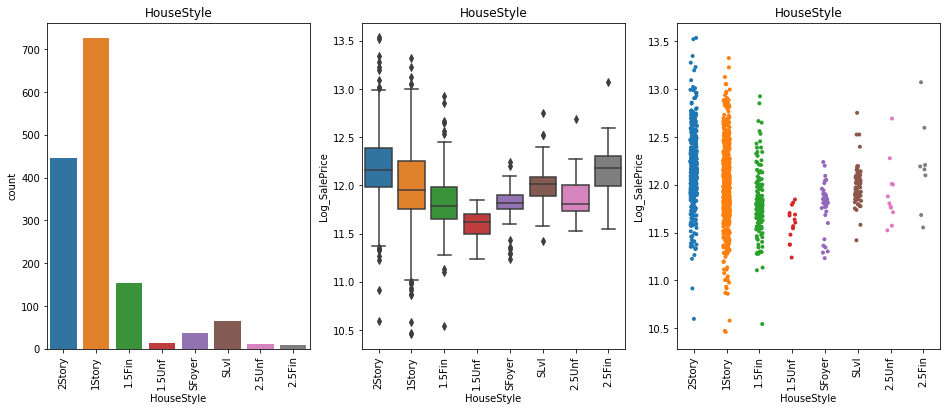

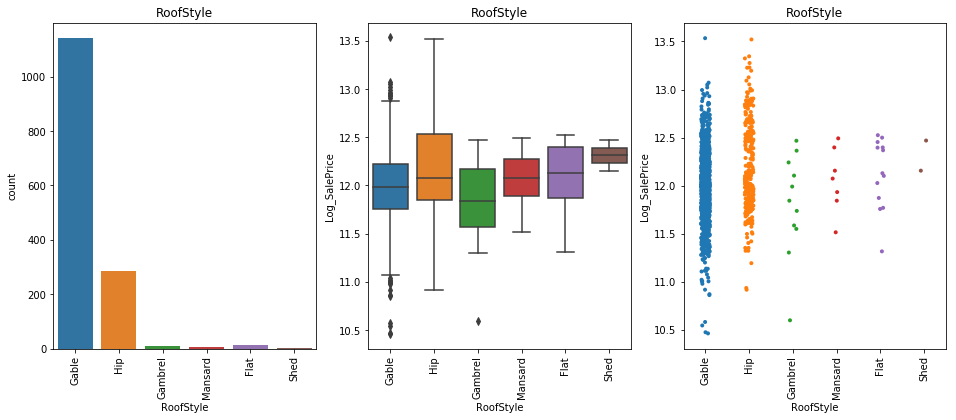

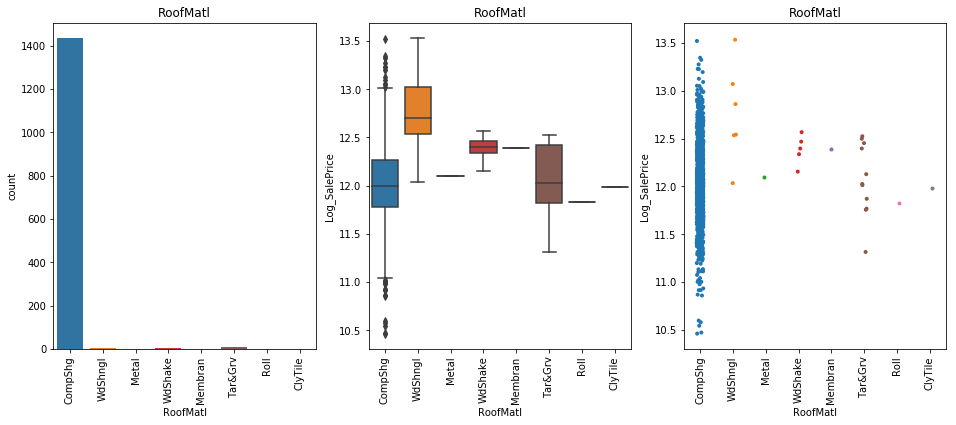

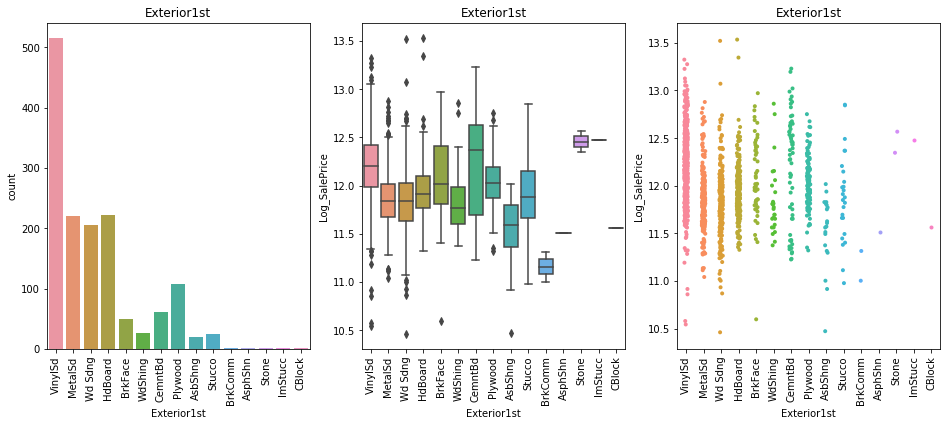

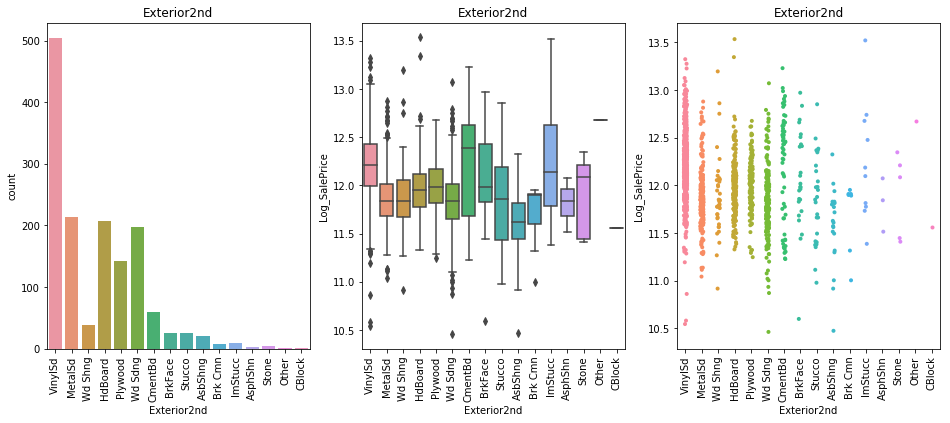

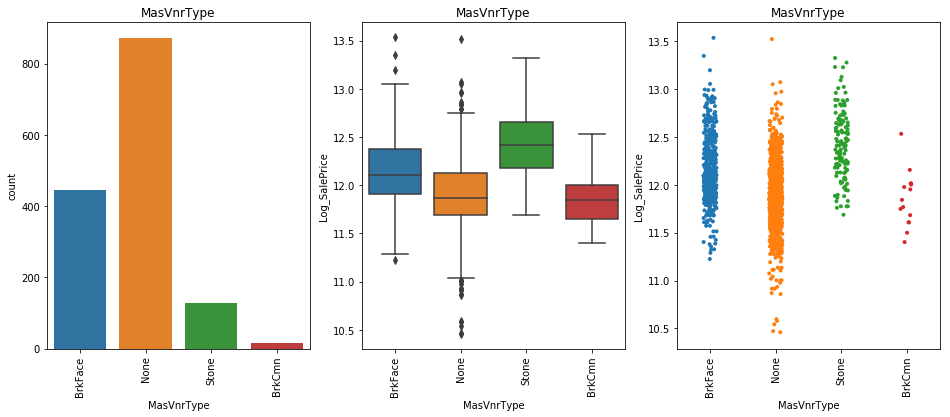

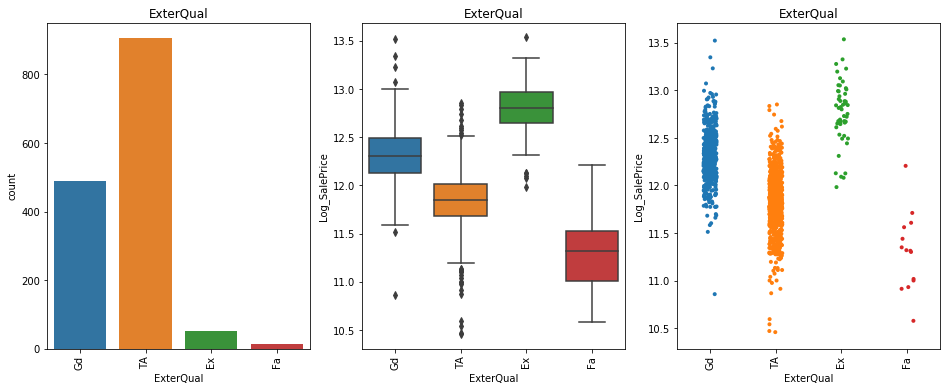

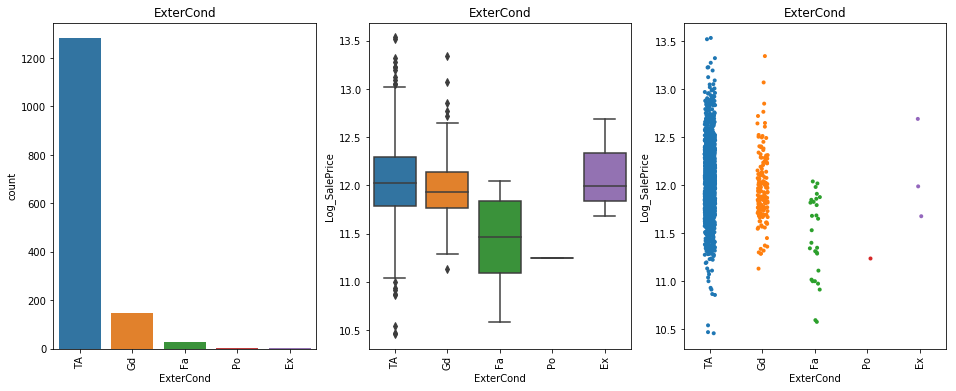

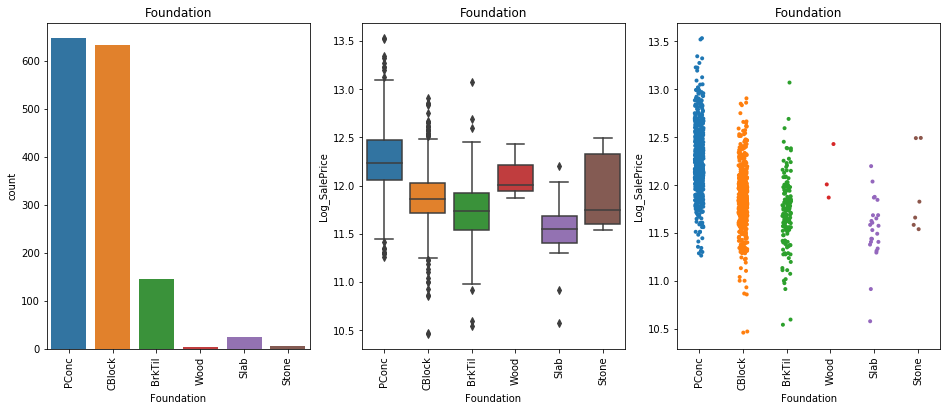

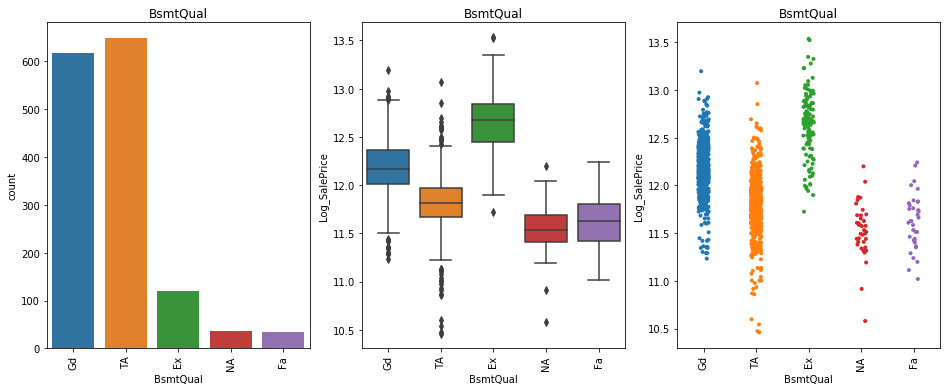

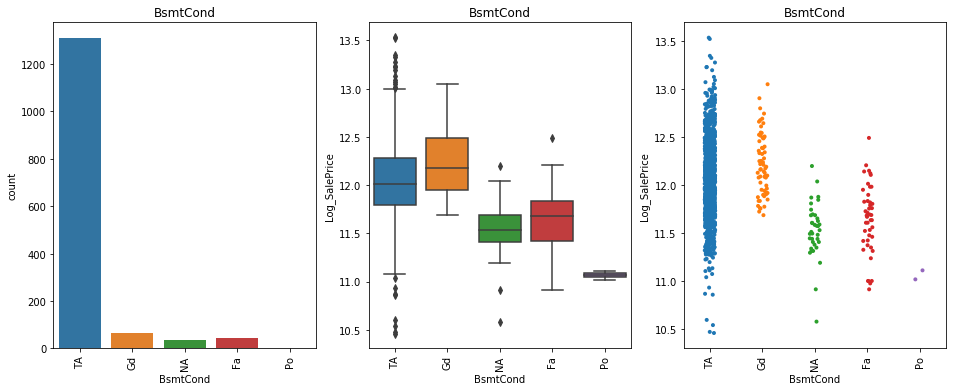

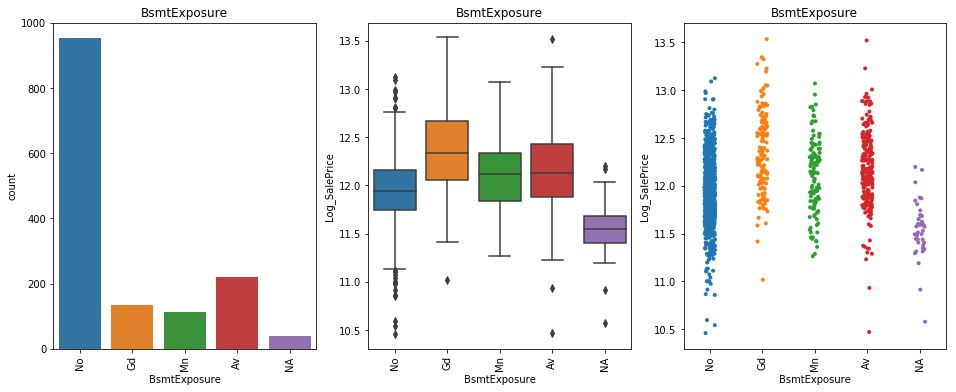

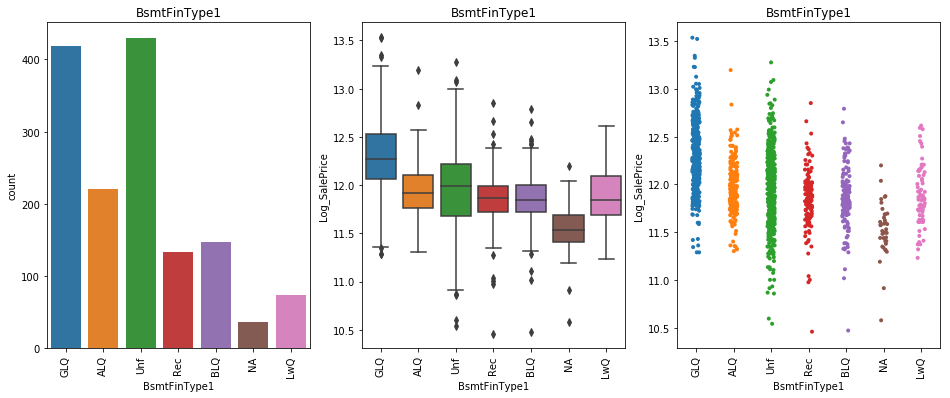

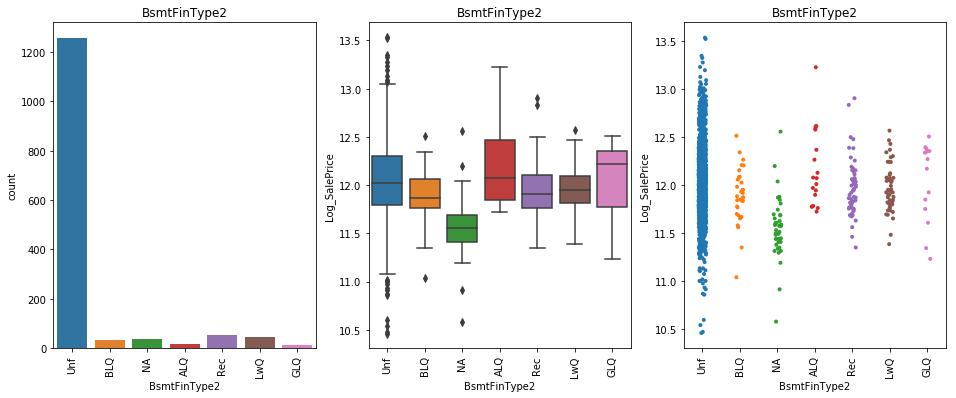

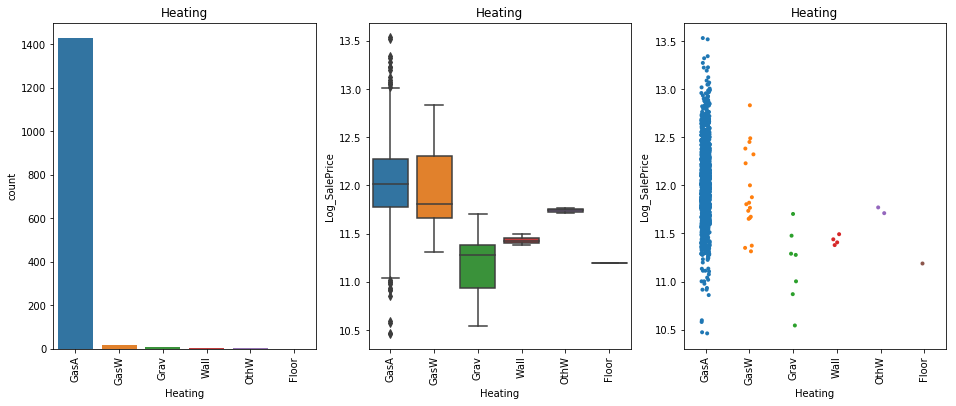

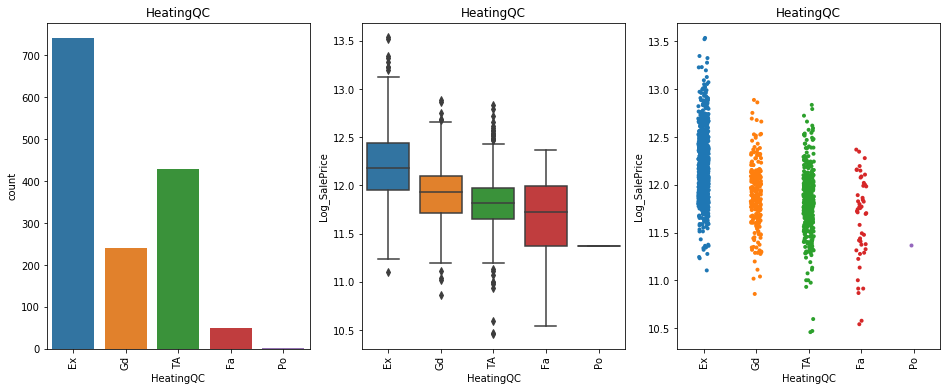

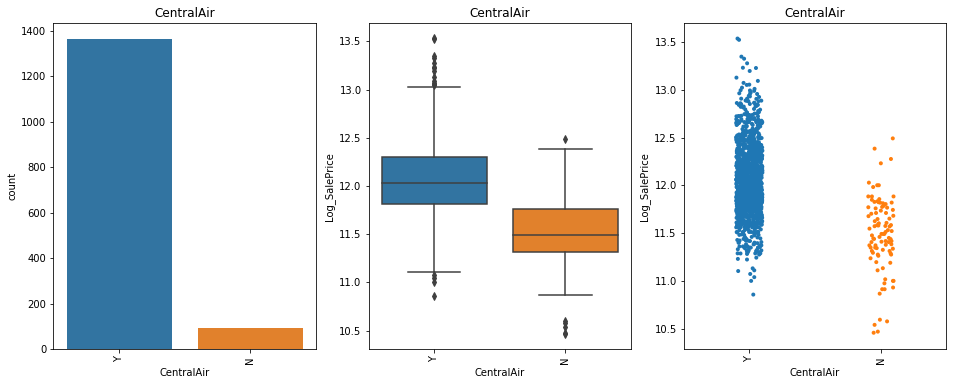

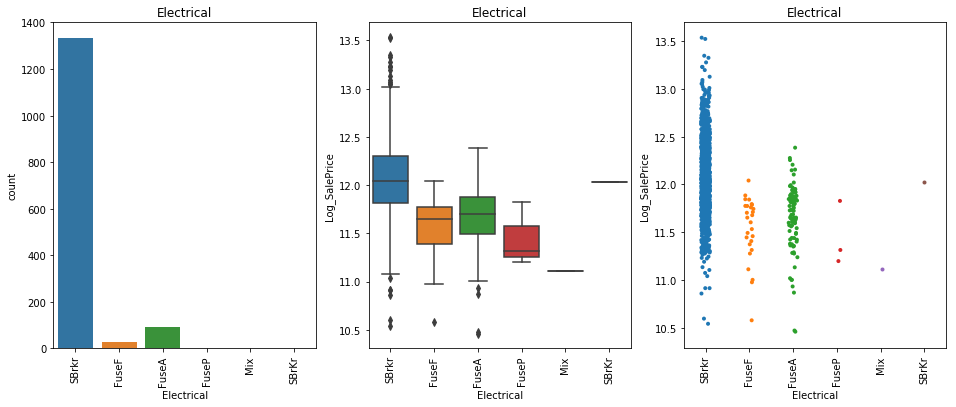

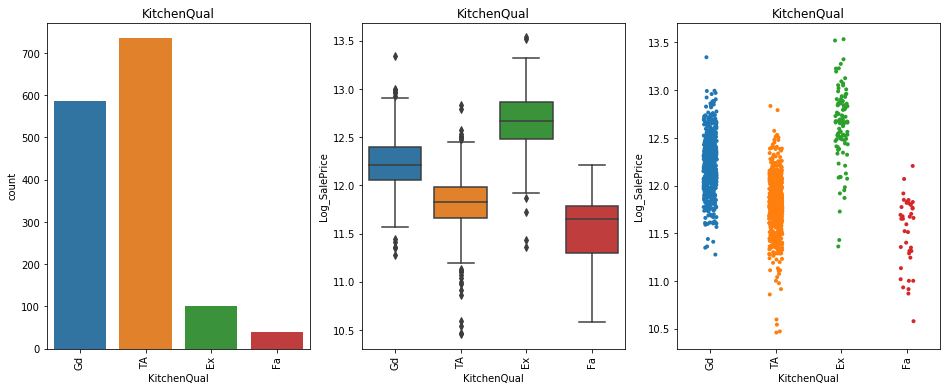

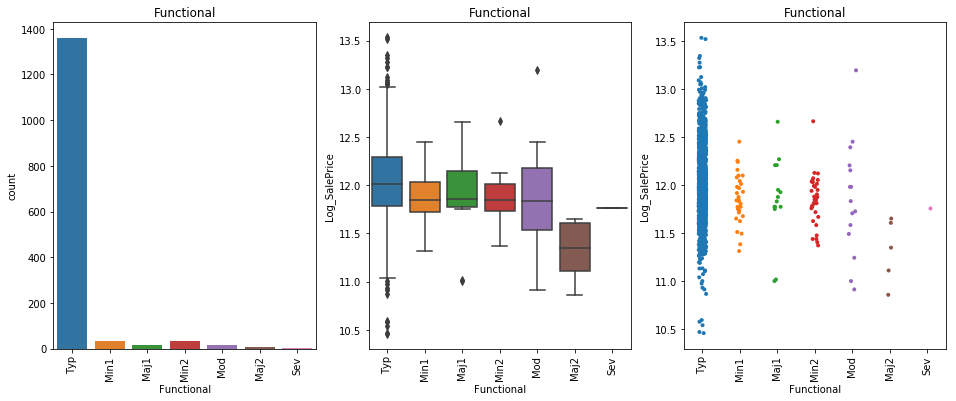

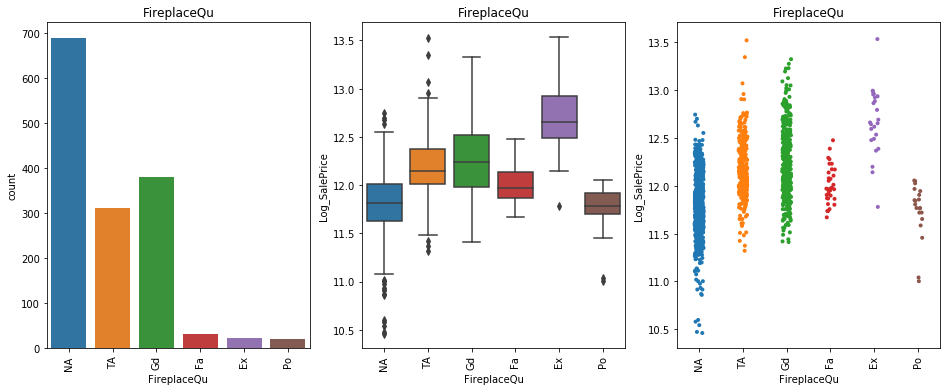

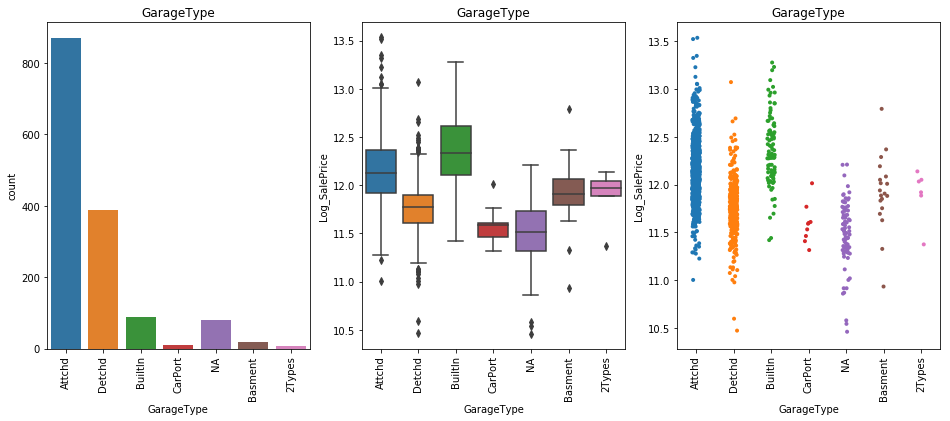

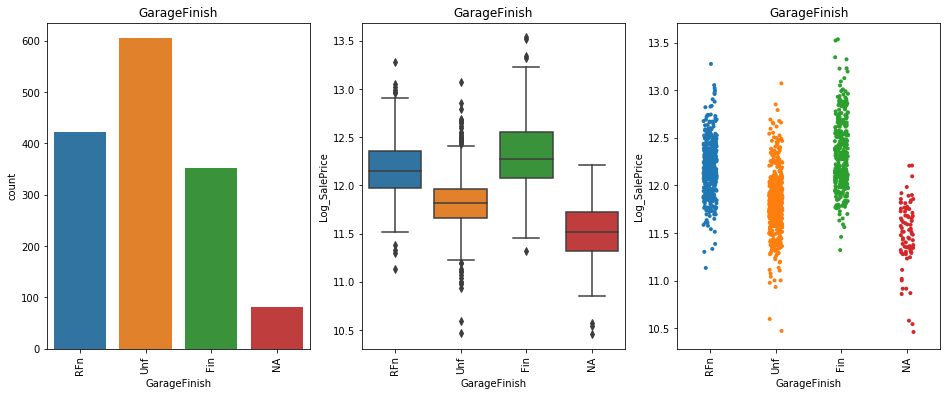

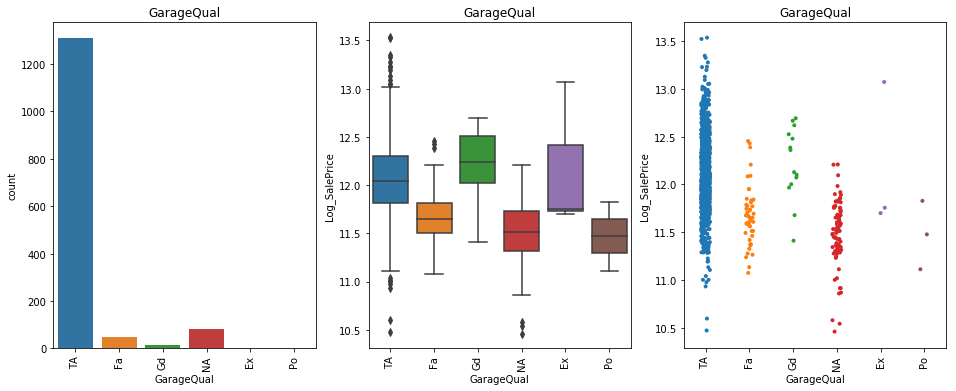

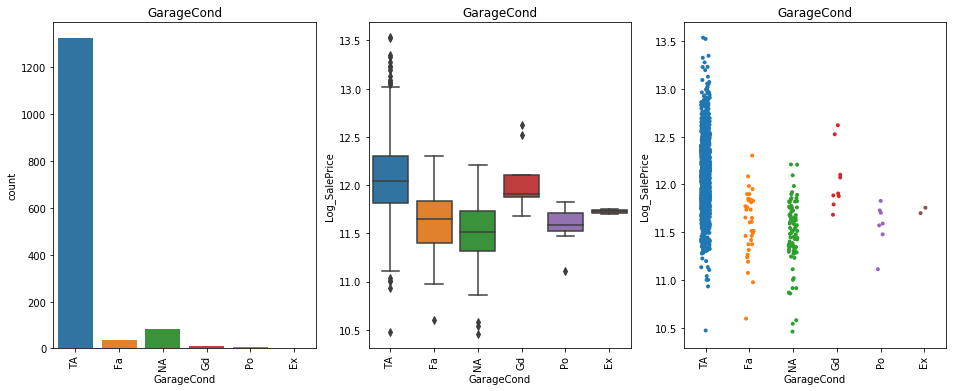

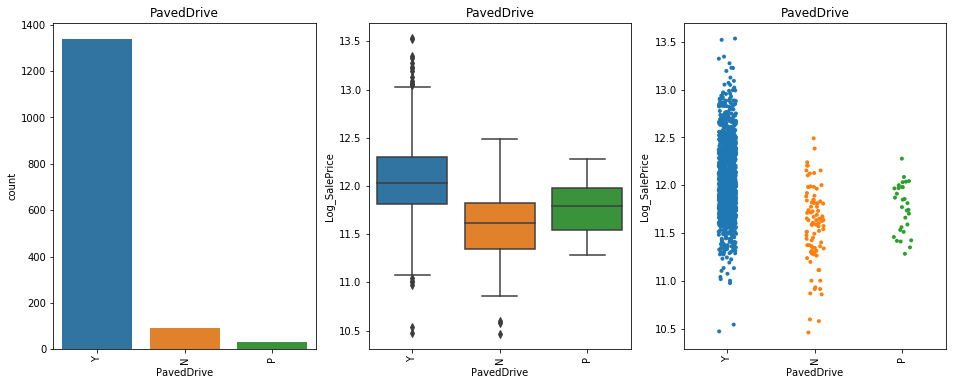

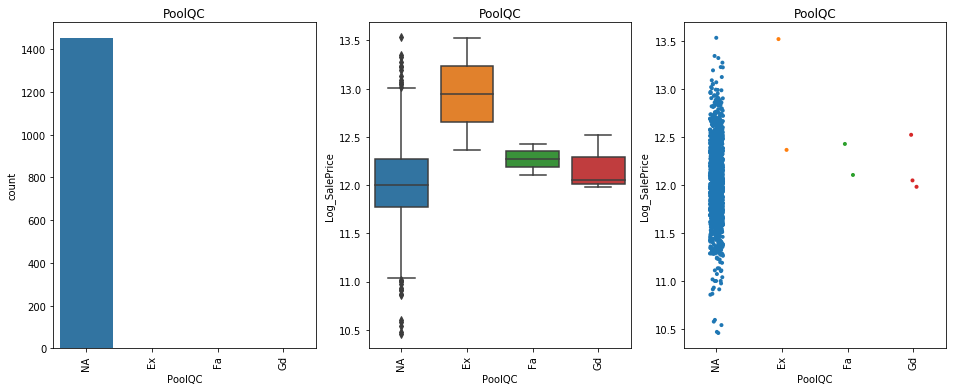

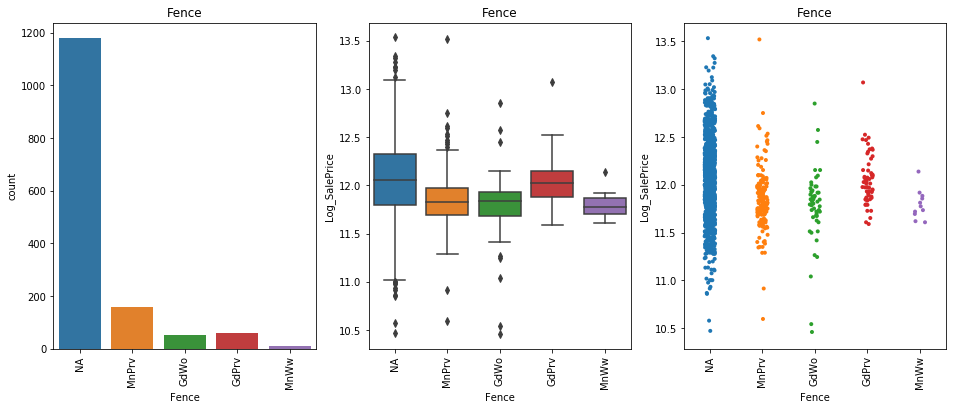

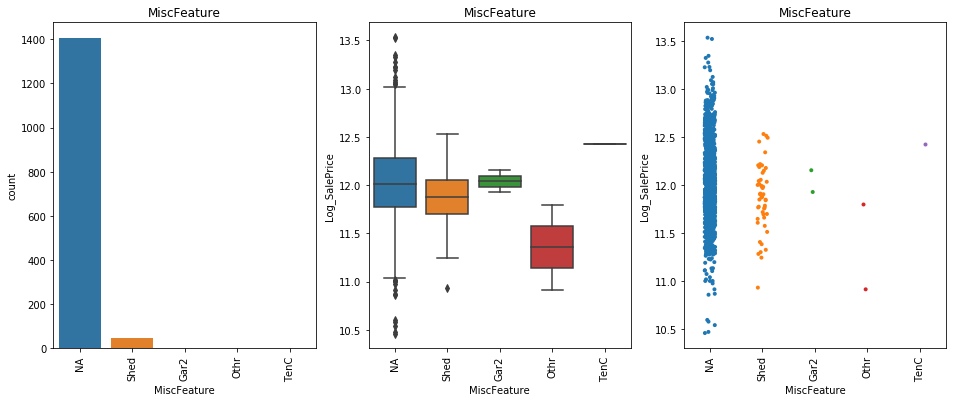

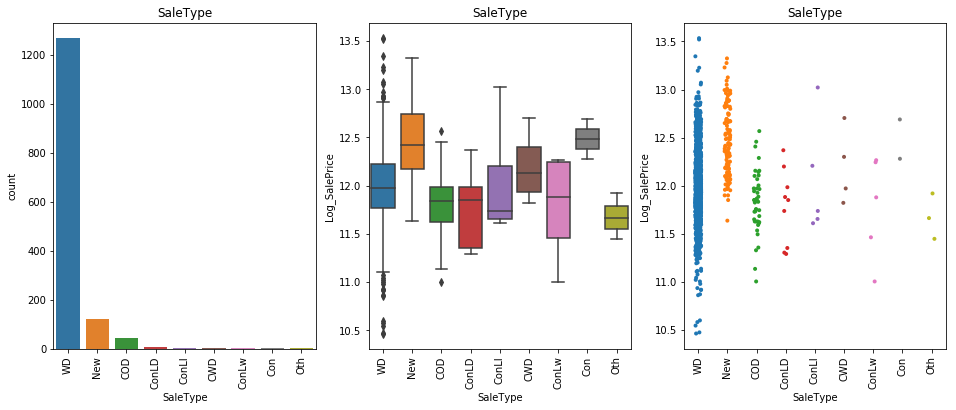

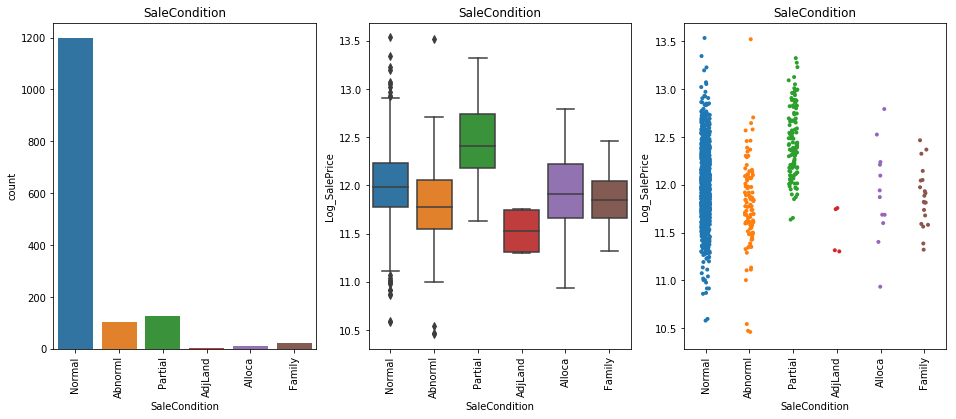

In [38]:
for i in categorical_feature:
    plt.figure(figsize = (16,6))
    plt.subplot(1,3,1)
    sns.countplot(x = train_df[i], data = train_df)
    plt.xticks(rotation=90)
    plt.title(i)

    plt.subplot(1,3,2)
    sns.boxplot(x = i, y = "Log_SalePrice", data = train_df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.subplot(1,3,3)
    sns.stripplot(x = i, y = "Log_SalePrice", data = train_df, size = 4, edgecolor="gray")
    plt.title(i)
    plt.xticks(rotation=90)

1. For MSZoning, most of the zoning comes under Residential Low Density(RL),then Residential Medium Density(RM),
    Commercial(C(all)),Floating Village Residential(FV),Residential High Density(RH).RL and FV are more expensive 
     where as commercial building is the least expensive one.

2. Most of the Houses doesnot have Alley.Building without alley or paved alley are more expenisve.

3. Majority has Regular Plot shape.Regular Lotshape are cheaper compared to irregurlar plot  shape.

4. Majority of the property (Land Contour) is flat or leveled.houses on hill side and depression cost more     compared to other housing land counter.

5. Almost all houses  has all public utitilies and just one houses has only gas and electricity which can be taken as outlier.

6. Most of the houses has gentle slope and price of houses increases with the land slope.

7. Most of the neighbour reside in CollgCr(College Creek),OldTown(Old Town),Names(North Ames).Here we can conslude that those neighbourhood which has most buildings  has comparably higher sale price.

8. Most of the building has normal conditions.bulding with greenbelt and park(PosN)and sale price decrease  when there is railroad or artery roads near by.

9. As External Quality increases sale price increase and most of the houses ar average in quality.

10. Salesprice of building increases  from poor to excellent basementQuality.

11. Houses with no basement are cheaper but there are very few houses with no basement.

12. Most of the houses has GasA heating(Gas heating with Air furnance).Houses having Gas Heating with air and Gas heating with steam  cost more.Heating Quality also depends on prices of houses.

13. Most of the Houses has central AC and cost more.

14. Having  sophisticated electircal circuit system  gthen houses cost more and cost of house decrease according the material use  and standard.

15. From the overall graph we can see that most of the housing price depend on the quality of various parameter.






In [39]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [40]:
numerical_features=numerical_features[1:-1]

In [41]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Numerical features which are more in categorical than  numerical.

In [42]:
ordinal_category=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

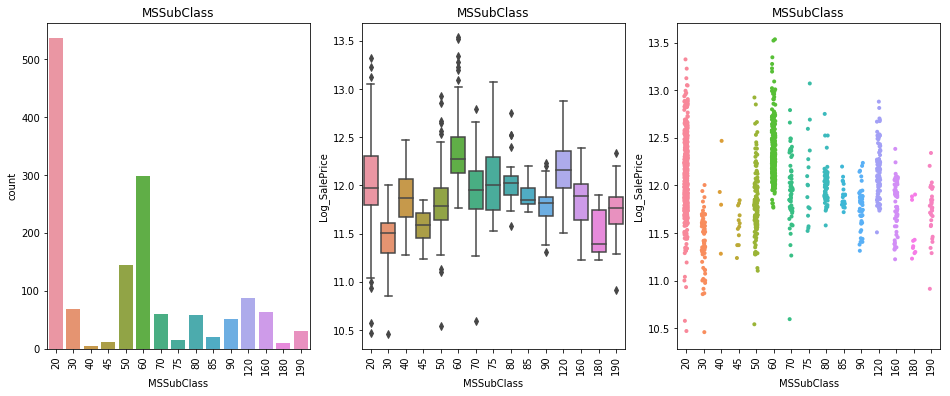

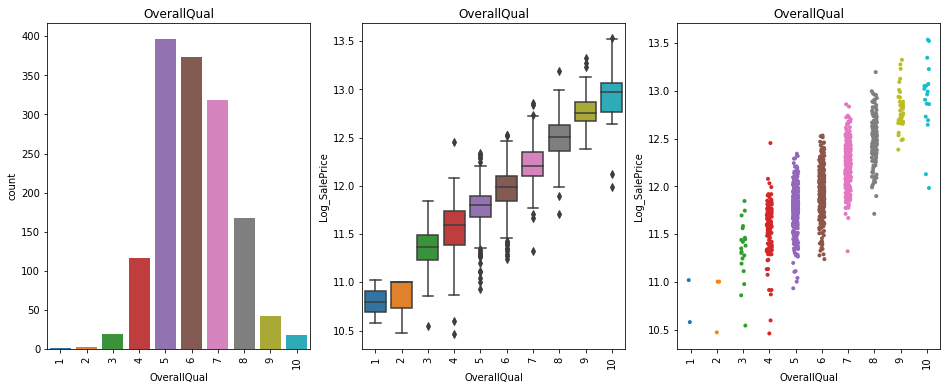

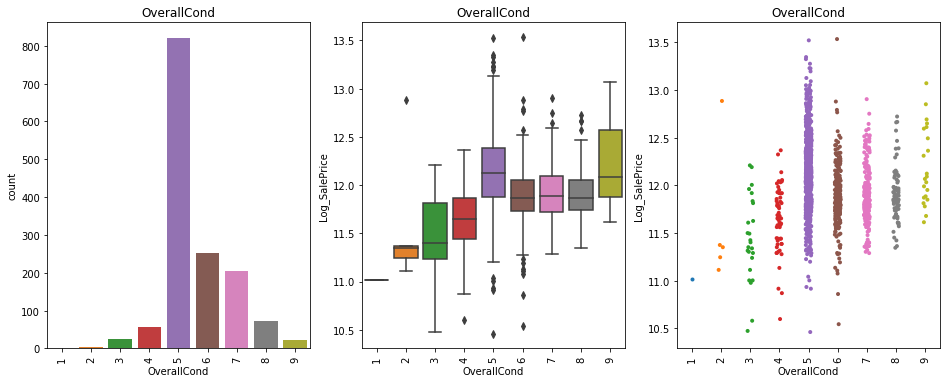

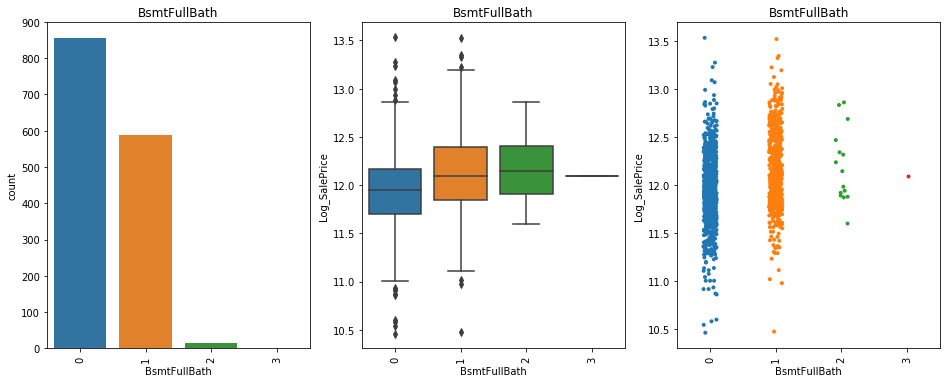

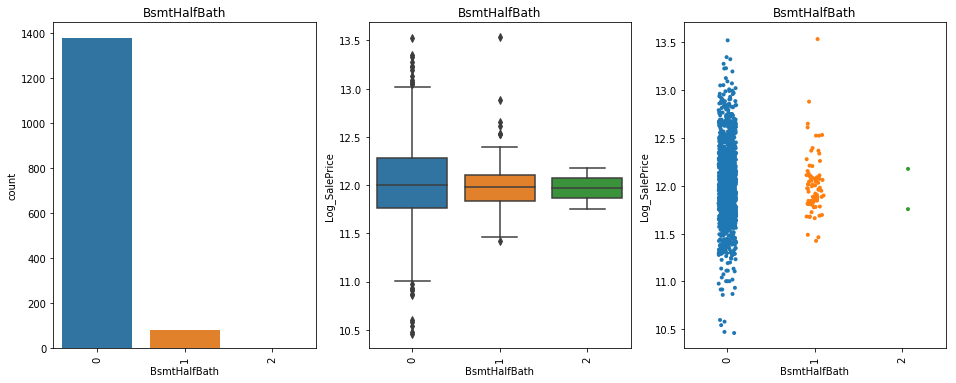

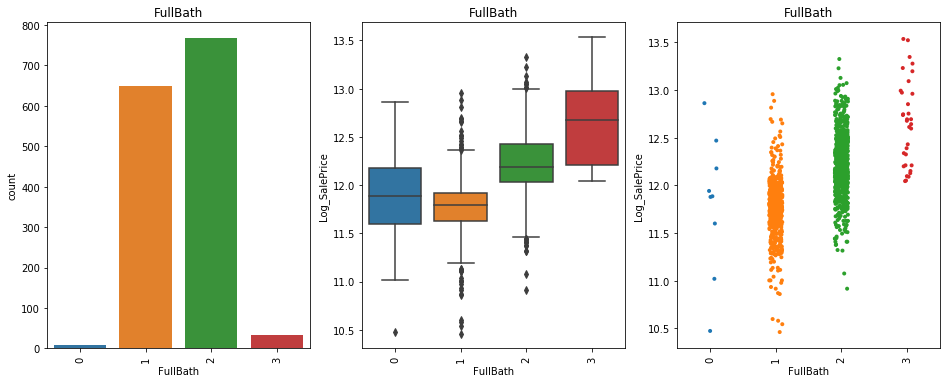

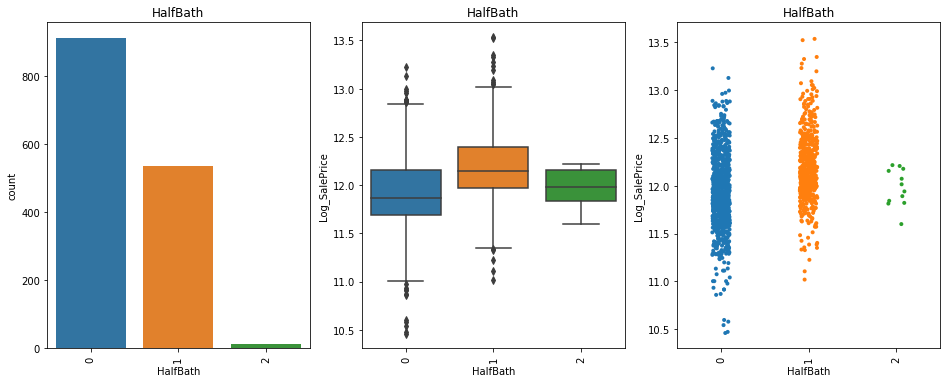

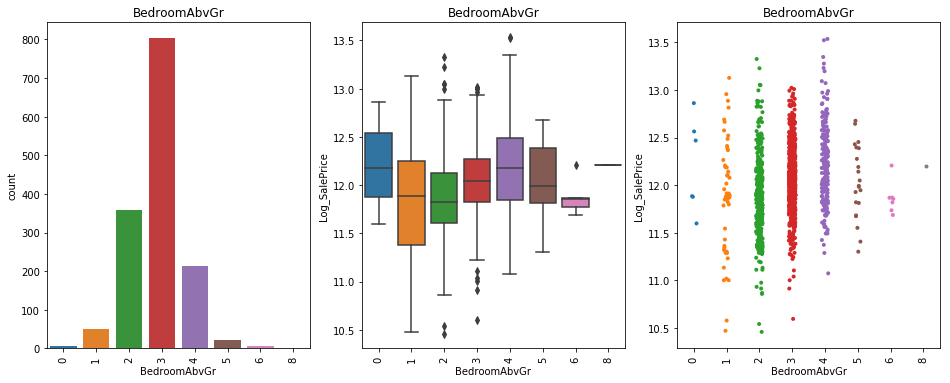

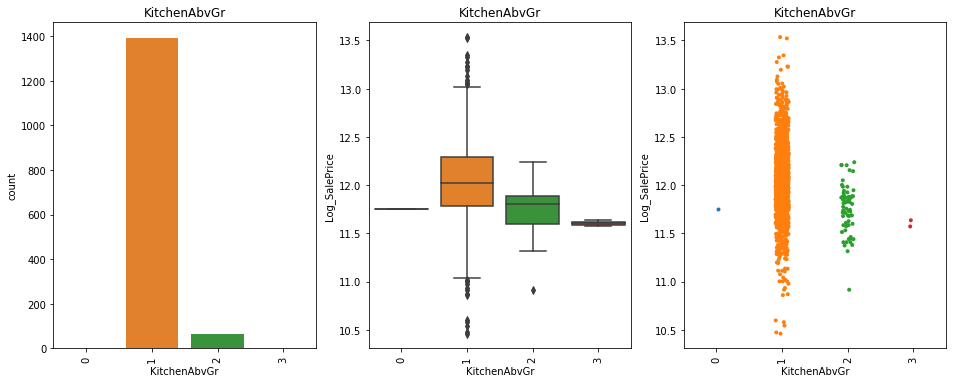

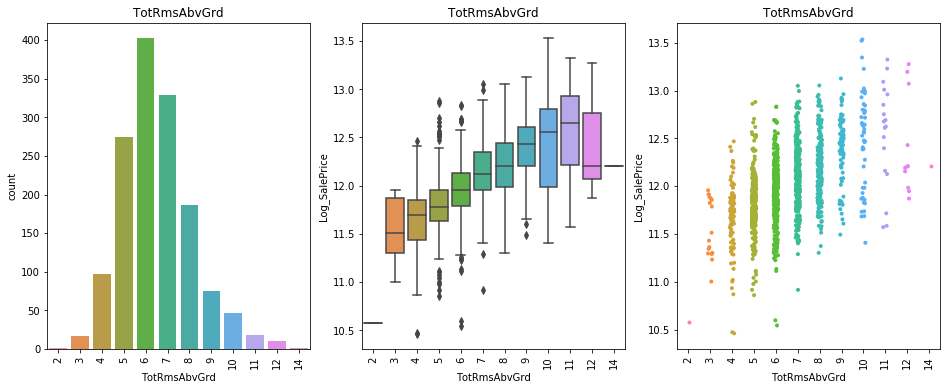

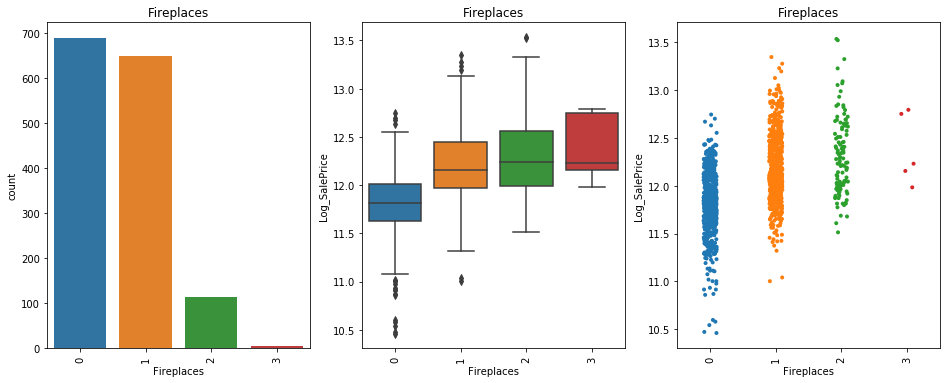

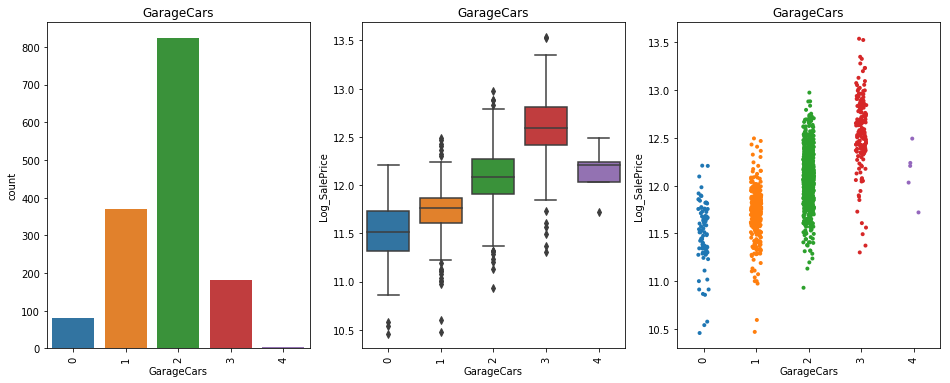

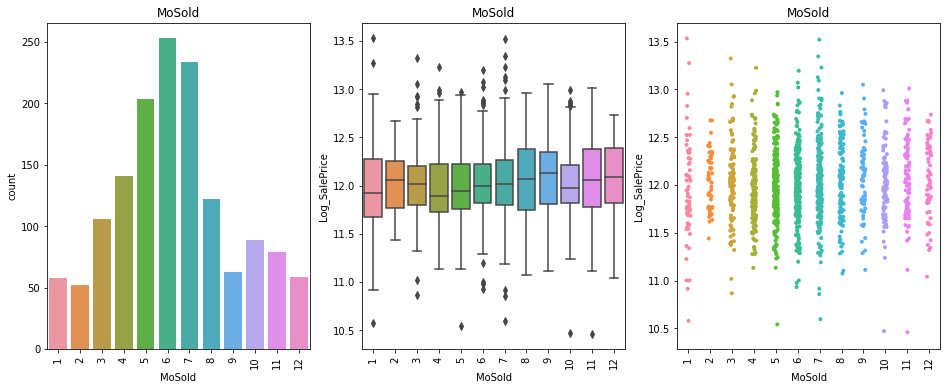

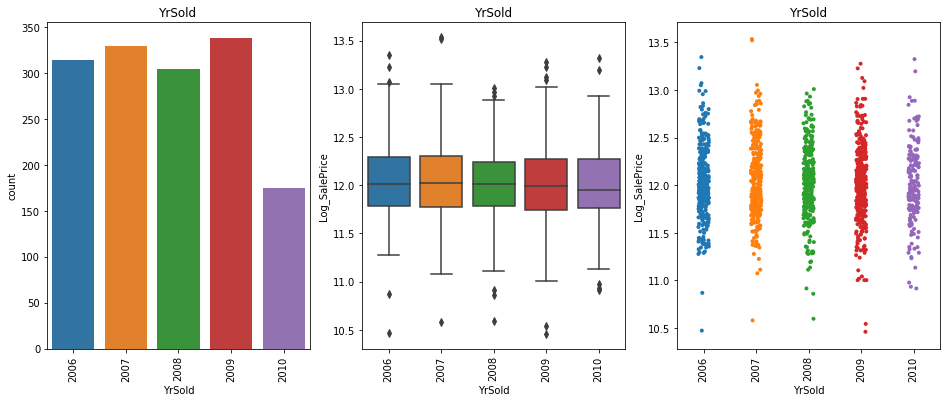

In [43]:
for i in ordinal_category:
    plt.figure(figsize = (16,6))
    plt.subplot(1,3,1)
    sns.countplot(x = train_df[i], data = train_df)
    plt.xticks(rotation=90)
    plt.title(i)

    plt.subplot(1,3,2)
    sns.boxplot(x = i, y = "Log_SalePrice", data = train_df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.subplot(1,3,3)
    sns.stripplot(x = i, y = "Log_SalePrice", data = train_df, size = 4, jitter = True, edgecolor="gray")
    plt.title(i)
    plt.xticks(rotation=90)

1. Cost of the Housing price  increases as overall qualityor overall condition  increases
2.  most of the houses doesnot have BsmtFullBath  and BsmtHalfBath.There is only one house which has three BsmtFullBath and also one of the contributor to costing of house price.
3. Most of the houses has fullBath  bathroom atleast one or two and price house also increases with the number of  FullBath.
4. There are 3 bedrooms above grade mostly but it doesnot effect the bedroom above ground.
5. As the toal room above grade increase the housing price increases too.
6. Most of the houses doenot have fireplace and as number of fireplace increase, the cost of houses increases.
7. As the size of garage increase  hosuing price increases.Since there are very few points on strip plot hence we can consider it as outlier.
8. Most of the houses are sold in May and  june.Housing price doesnot depend on months.



# Removing the ordinal categorical data and hence plotting the numerical data only 

In [44]:
ordinal_category

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [45]:
num_feature=[]
for feat in numerical_features:
    if feat not in ordinal_category:
        num_feature.append(feat)

In [46]:
num_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

/home/anish/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/anish/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


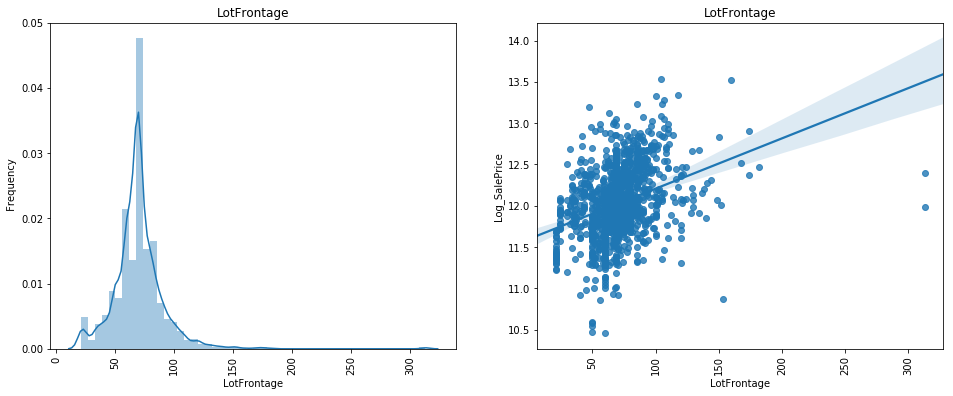

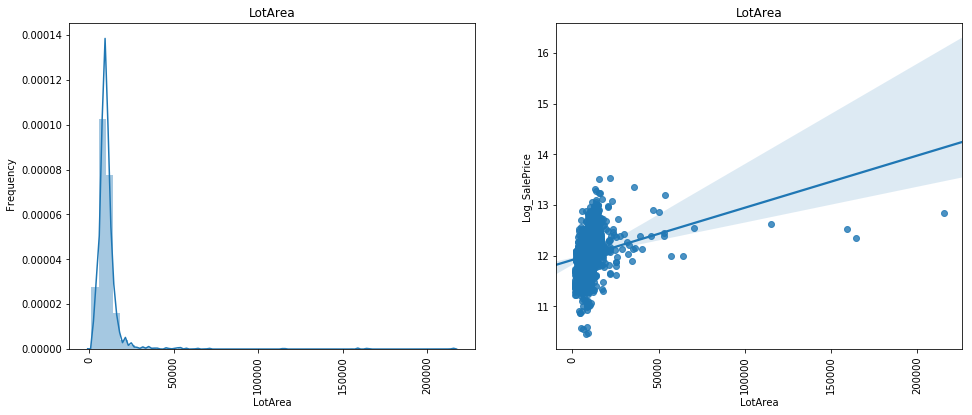

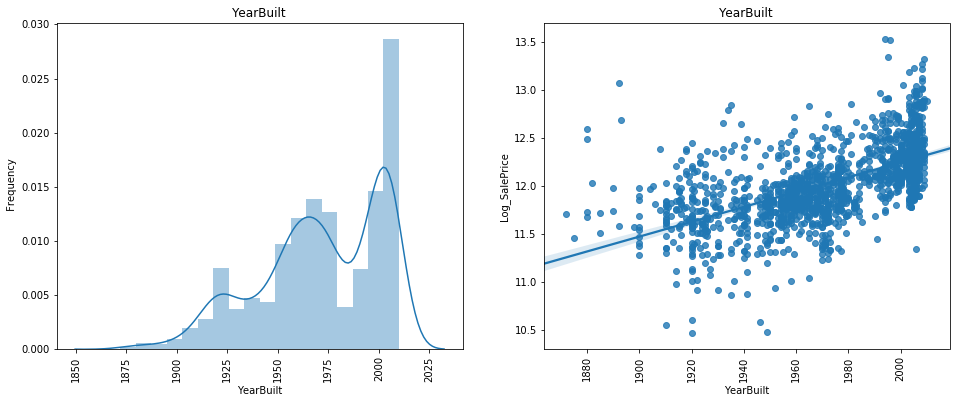

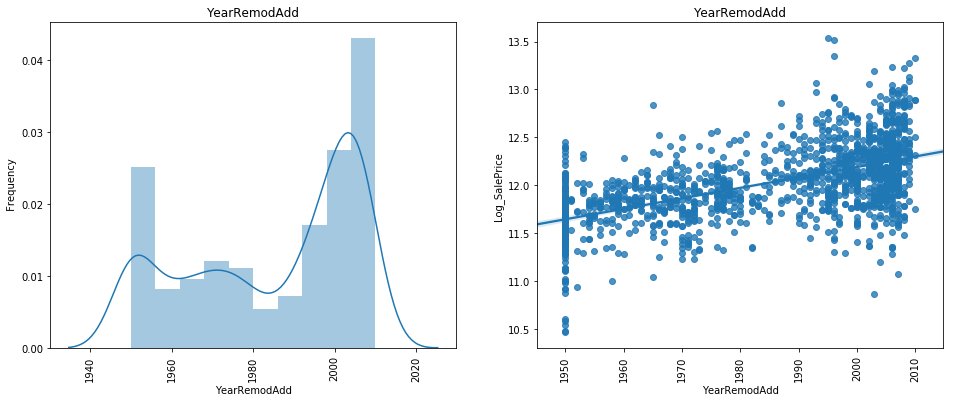

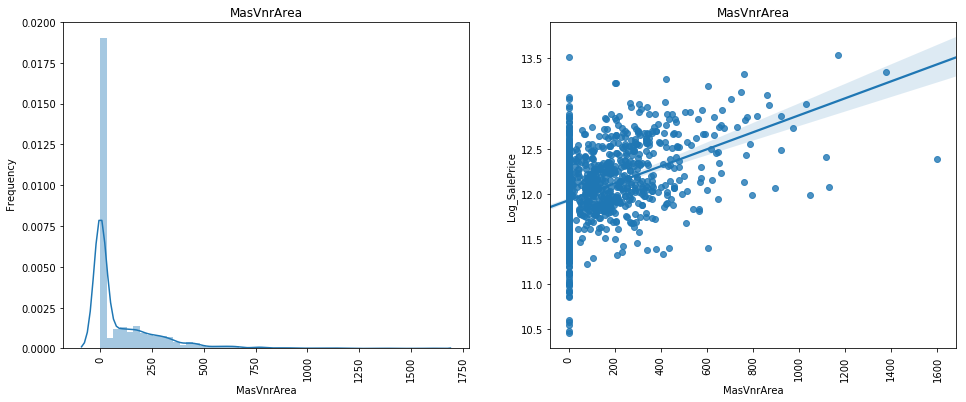

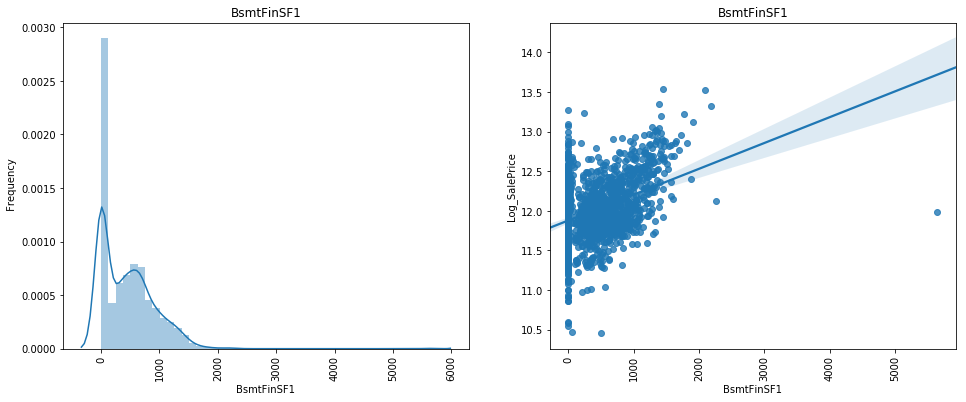

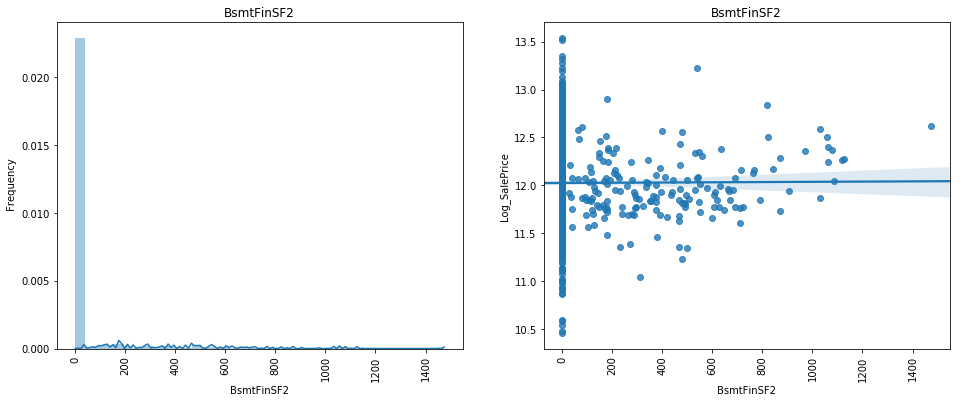

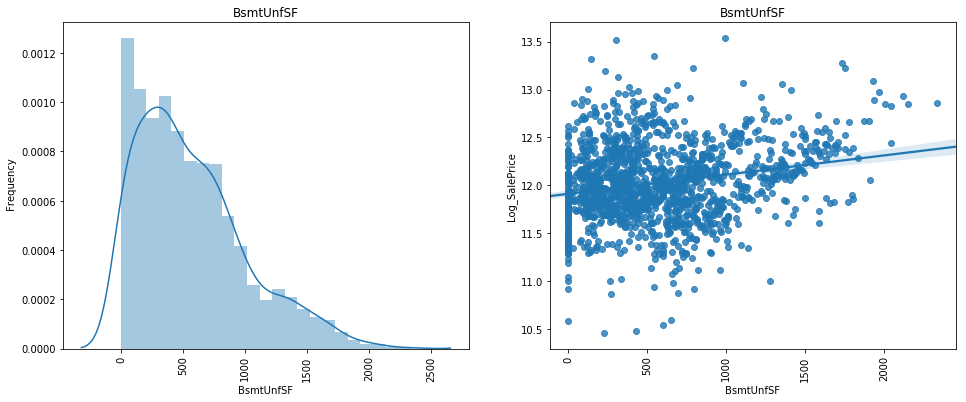

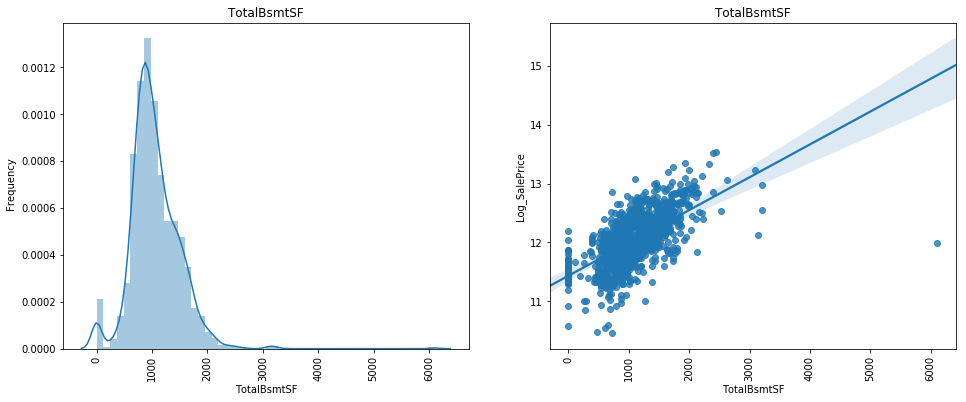

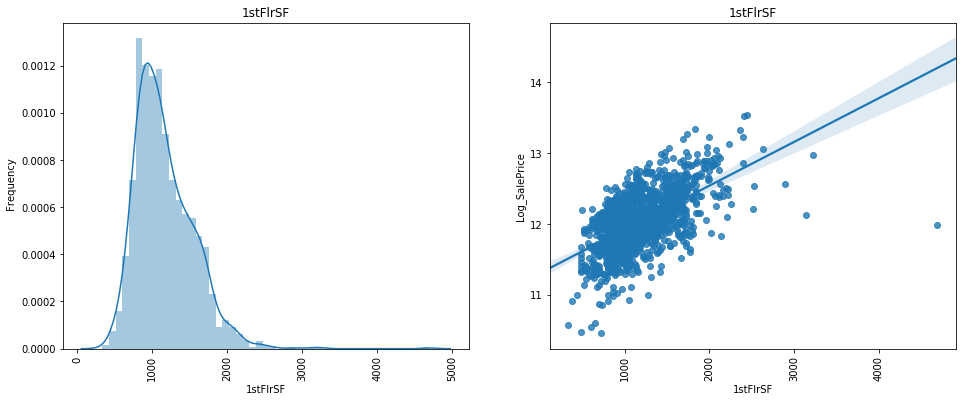

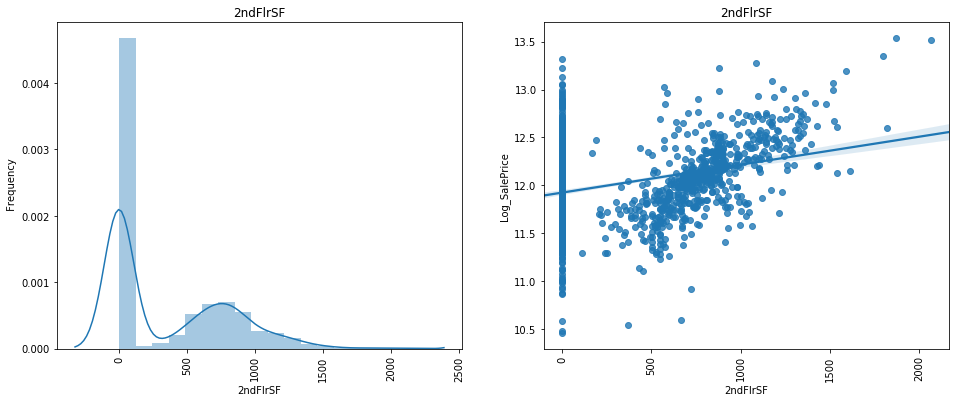

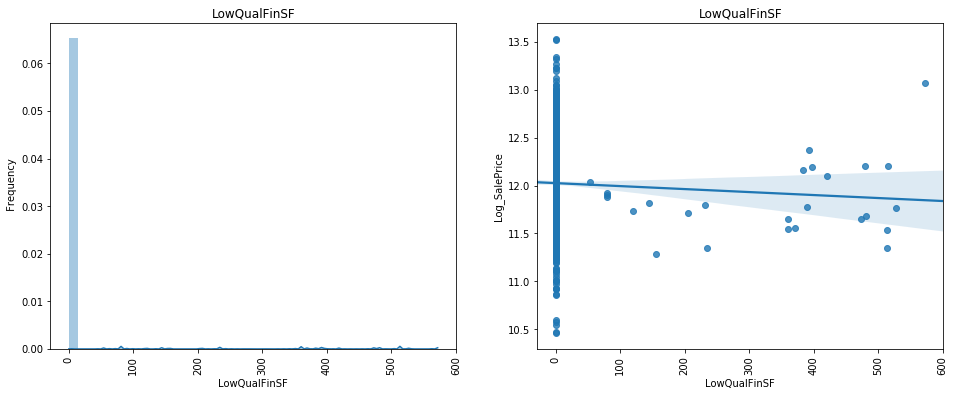

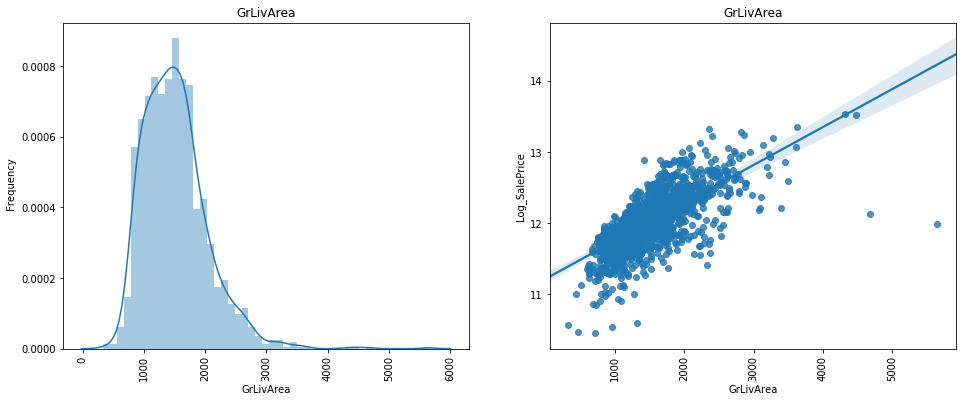

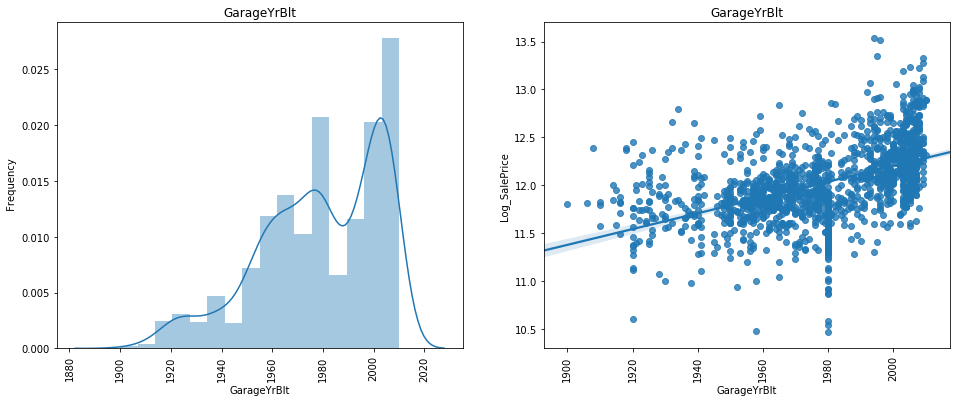

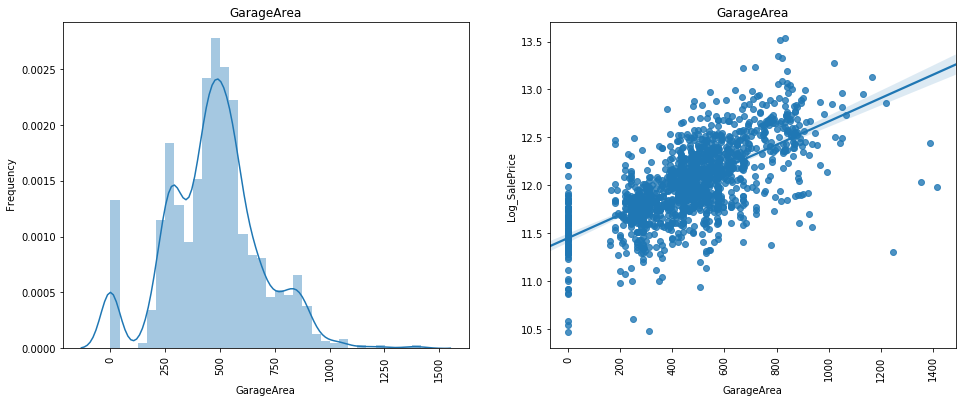

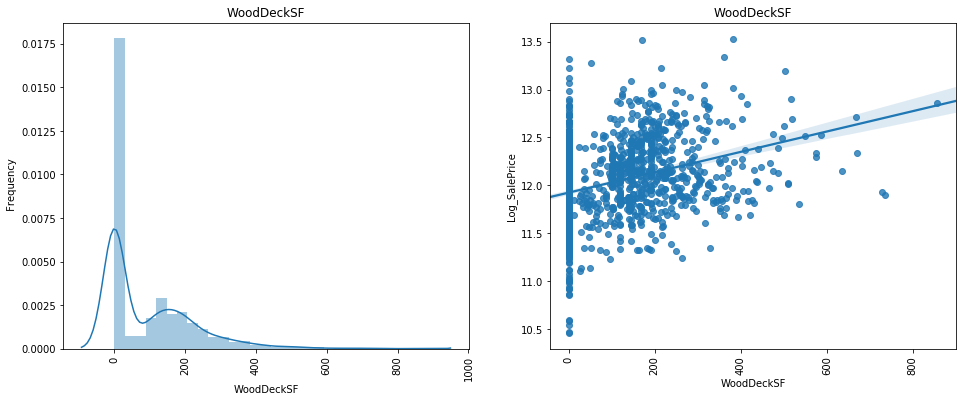

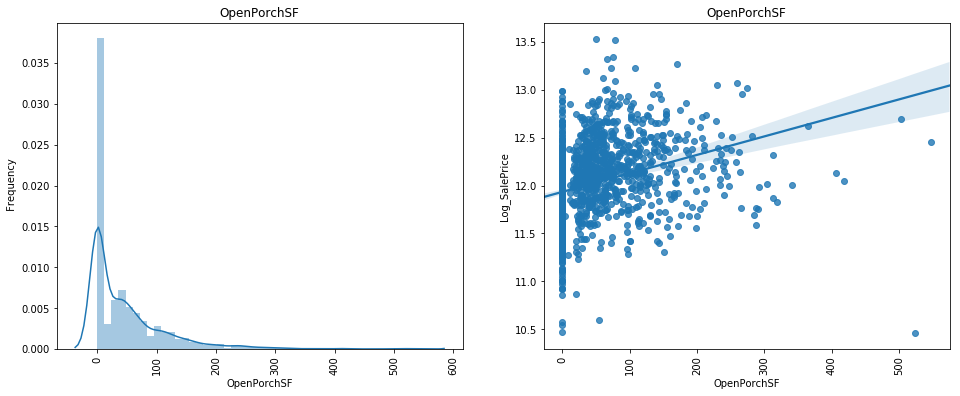

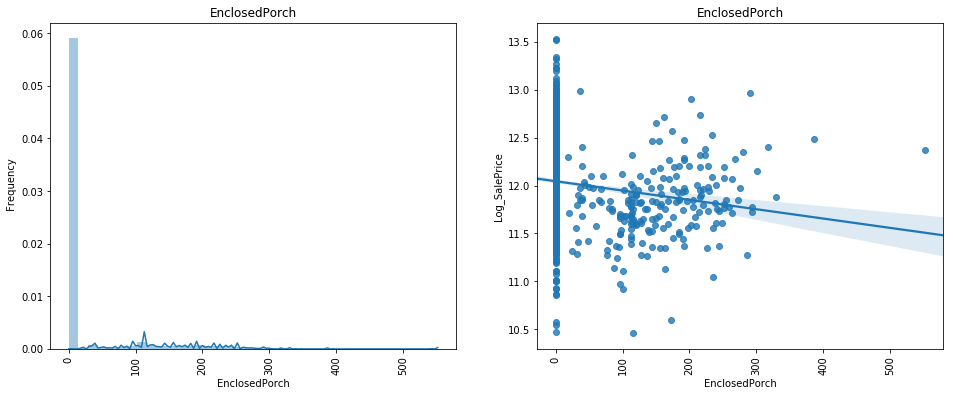

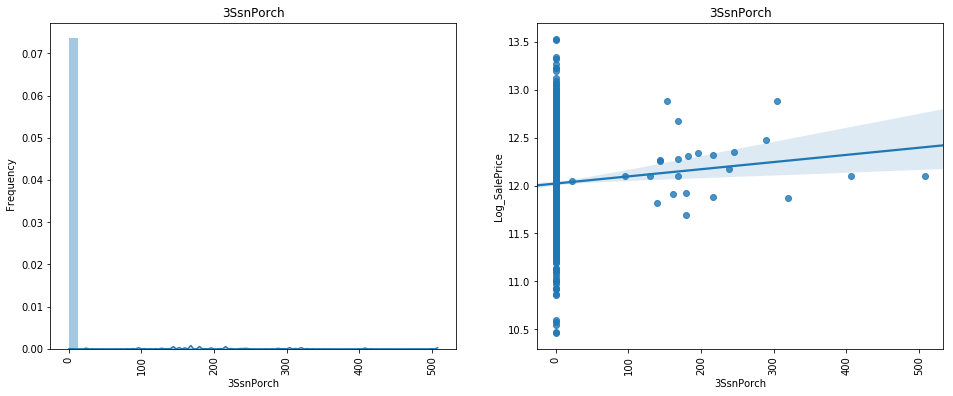

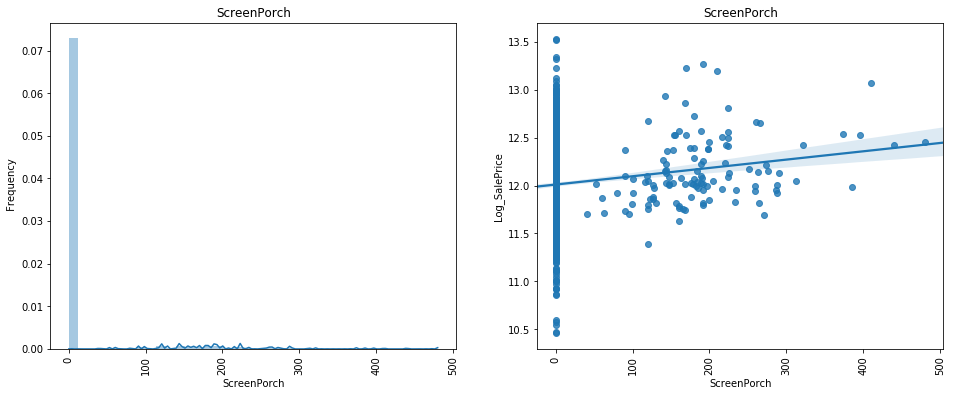

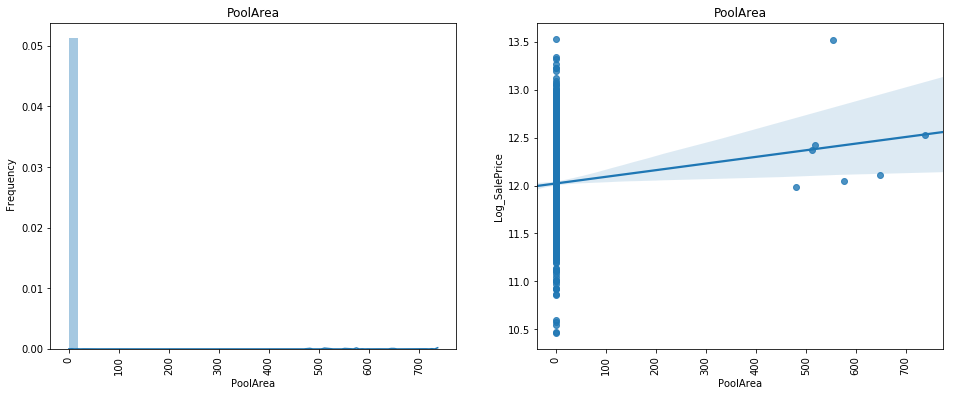

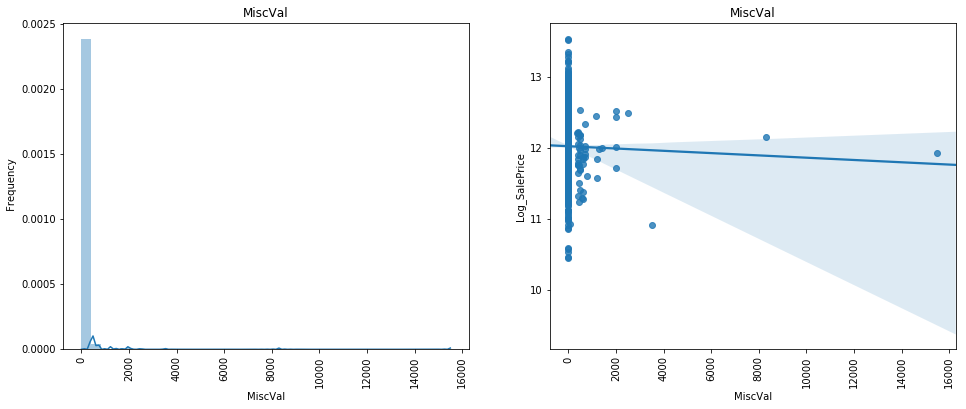

In [47]:
for i in num_feature:
    plt.figure(figsize = (16,6))
        
    plt.subplot(1,2,1)
    sns.distplot(train_df[i], kde = True)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.ylabel(" Frequency")

    plt.subplot(1,2,2)
    sns.regplot(x = i, y = "Log_SalePrice", data = train_df,)
    plt.title(i)
    plt.xticks(rotation=90)

1. As from the graph we can see that most of the houses are built on the period of 30 to 40 years i.e. it was built in 1925 then the houses are built in 1960(after 35 years),then after  huge ammount of houses are build on 2000s(i.e.  after 40 years), and  newer the house more prices it hold.
 2. Most of the houses doesnot have Masonary Area.BsmtFinSF1,PoolArea
 3. LotFrontage Area, LotArea  increases then sale price also increases but due to the outlier the regression plot doesnot show the actual slanted line.
 4.  As BsmtFinSF1,Total BsmtSF,1stFirSF,2ndFlrSF,GrLivArea,GarageArea increases then saleprice increases.

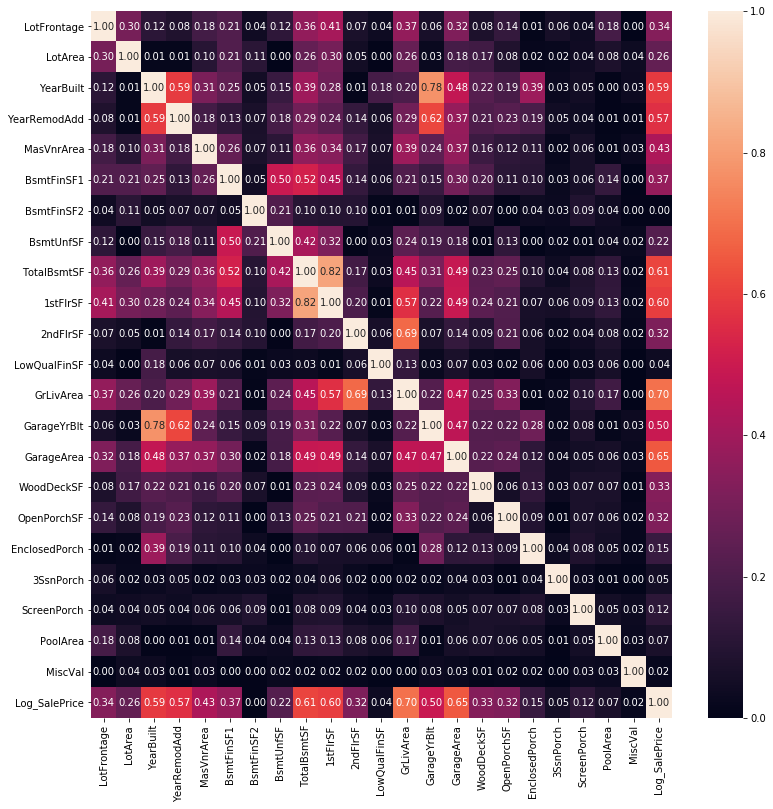

In [48]:
plt.figure(figsize=(13,13))
feature=num_feature+['Log_SalePrice']
sns.heatmap(abs(train_df[feature].corr()),annot=True,fmt='0.2f')

1.YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea is more correalated to other features.

2.YearBuilt is correlated with YearRemodAdd,GarageYearBlt

3.BsmtFinSF1 is correlated with BsmtUnfSF,TotalBsmtSF.

4.TotalBsmt  is highly corrletae with 1stFlrSF and GrLivArea, it also shows that most houses have 1st floor only.

5.GrLivArea is correlated to 1stFlrSF.


# Pairplot of highly correlated  features 

In [49]:
corr_features=['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt','GarageArea',
               'Log_SalePrice']

/home/anish/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

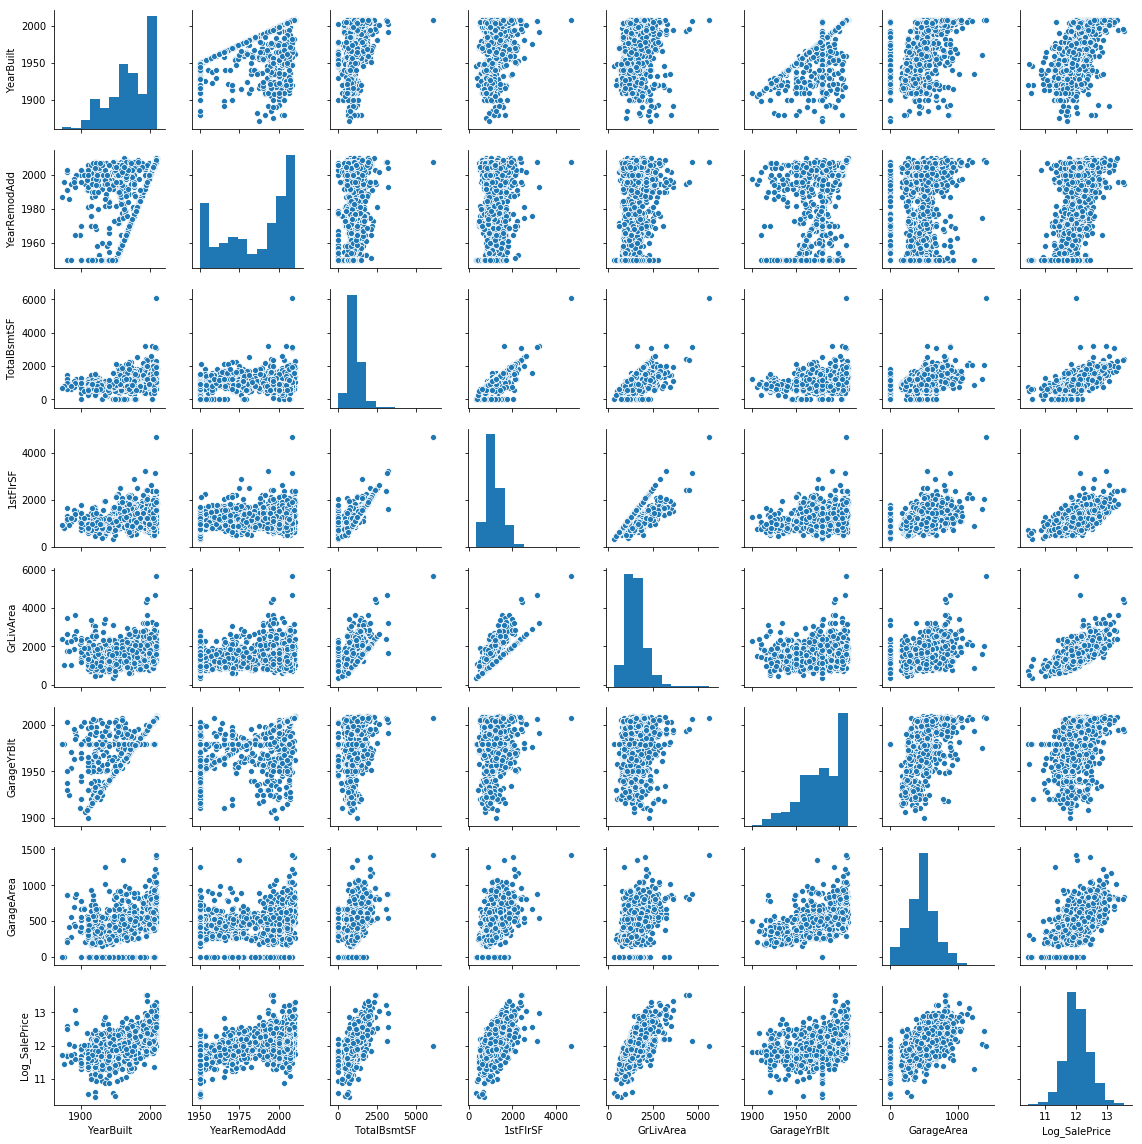

In [50]:
plt.figure(figsize=(10,10))
sns.pairplot(train_df[corr_features],size = 2 ,kind ='scatter')

In [51]:
ordinal_category.append('Log_SalePrice')

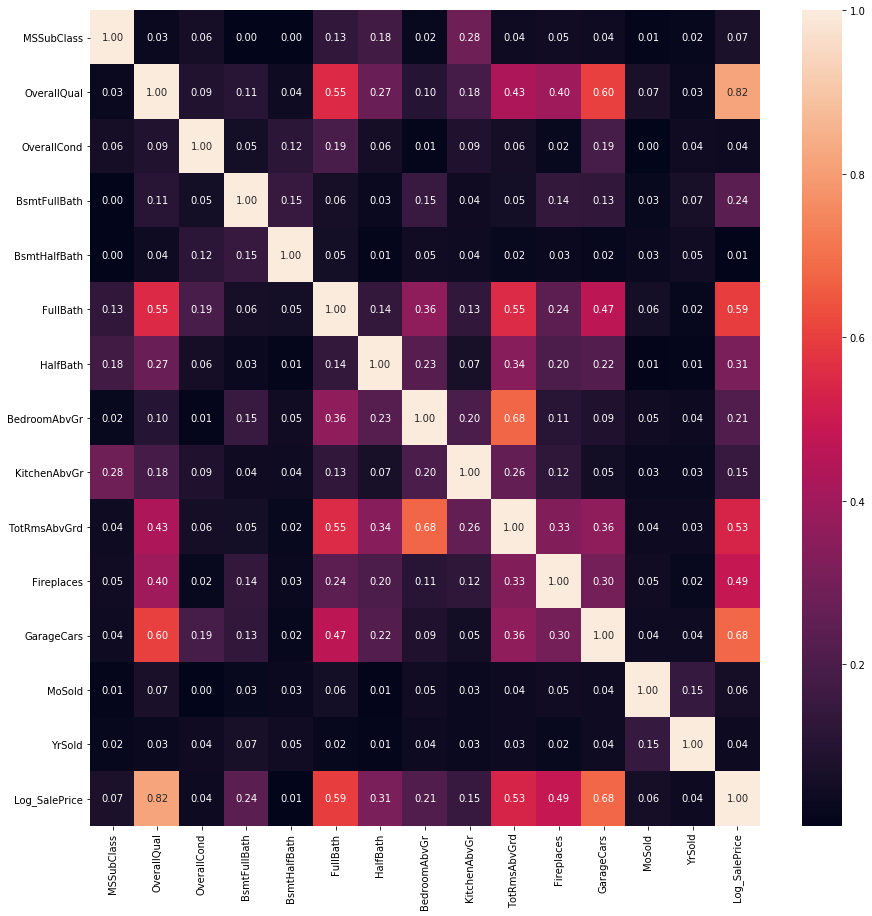

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(data=abs(train_df[ordinal_category].corr()),annot=True,fmt='0.2f')

Log saleprice is correlated to overallQuality,Fullbath,TotRmsAbvGr,Garagecars size. 

In [53]:
Corr_feature1=['OverallQual','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','Log_SalePrice']

/home/anish/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

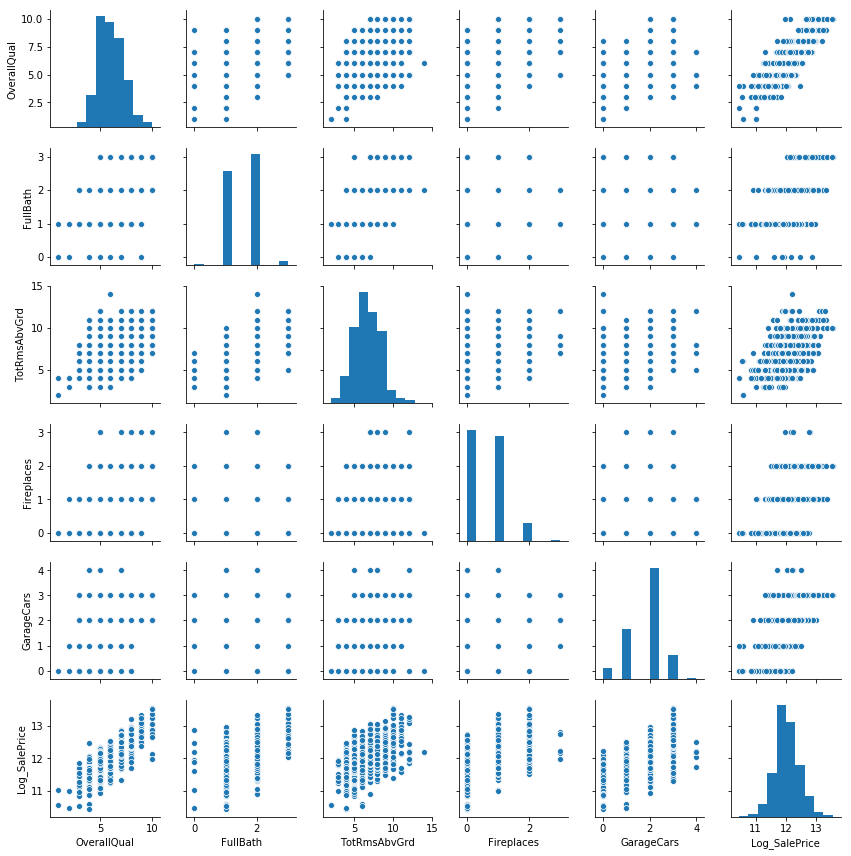

In [54]:
plt.figure(figsize=(10,10))
sns.pairplot(train_df[Corr_feature1],size = 2 ,kind ='scatter')

# Summary:

1.As we see from the figurePoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage has more missing values where as GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical.

2." From the above figure we can estimate what can be fill the missing value."
    1. Filling RL in MSZoning
    2. Filling AllPub in Utilies
    3. Filling Typ in Functional
    4. Filling VinylSd in Exterior1st
    5. Filling SBrKr in Electircal
    6. Filling VinylSd in Exterior2nd
    7. Filling TA in KitchenQual
    8. Filling WD in SaleType
    
3.From Above we can conclude that since MasVnrType(Masonry veneer type) is None Hence all 23 blank in MasVnrArea should be 0.

4.converting  Saleprice into Logarithamic  saleprice value to decrease skewness and kurtosis.

5.For MSZoning, most of the zoning comes under Residential Low Density(RL),then Residential Medium Density(RM),
    Commercial(C(all)),Floating Village Residential(FV),Residential High Density(RH).RL and FV are more expensive 
     where as commercial building is the least expensive one.

6.Most of the Houses doesnot have Alley.Building without alley or paved alley are more expenisve.

7.Majority has Regular Plot shape.Regular Lotshape are cheaper compared to irregurlar plot  shape.

8.Majority of the property (Land Contour) is flat or leveled.houses on hill side and depression cost more     compared to other housing land counter.

9.Almost all houses  has all public utitilies and just one houses has only gas and electricity which can be taken as outlier.

10.Most of the houses has gentle slope and price of houses increases with the land slope.

11.Most of the neighbour reside in CollgCr(College Creek),OldTown(Old Town),Names(North Ames).Here we can conslude that those neighbourhood which has most buildings  has comparably higher sale price.

12.Most of the building has normal conditions.bulding with greenbelt and park(PosN)and sale price decrease  when there is railroad or artery roads near by.

13.As External Quality,basementQuality increases sale price increase and most of the houses ar average in quality.


15.Houses with no basement are cheaper but there are very few houses with no basement.

16.Most of the houses has GasA heating(Gas heating with Air furnance).Houses having Gas Heating with air and Gas heating with steam  cost more.Heating Quality also depends on prices of houses.

17.Most of the Houses has central AC and cost more.

18.Having  sophisticated electircal circuit system  gthen houses cost more and cost of house decrease according the material use  and standard.

19.From the overall graph we can see that most of the housing price depend on the quality of various parameter.

20.Cost of the Housing price  increases as overall qualityor overall condition  increases

21.Most of the houses doesnot have BsmtFullBath  and BsmtHalfBath.There is only one house which has three BsmtFullBath and also one of the contributor to costing of house price can be detected as outlier.

22.Most of the houses has fullBath  bathroom atleast one or two and price house also increases with the number of  FullBath.

23.There are 3 bedrooms above grade mostly but it doesnot effect the bedroom above ground.

24.As the total room above grade increase the housing price increases too.

25.Most of the houses doesnot have fireplace and as number of fireplace increase, the cost of houses increases.

26.As the size of garage increase  hosuing price increases.Since there are very few points on strip plot hence we can consider it as outlier.

27.Most of the houses are sold in May and  june.Housing price doesnot depend on months.

28.As from the graph we can see that most of the houses are built on the period of 30 to 40 years i.e. it was built in 1925 then the houses are built in 1960(after 35 years),then after  huge ammount of houses are build on 2000s(i.e.  after 40 years), and  newer the house more prices it hold.
 
29.Most of the houses doesnot have Masonary Area.BsmtFinSF1,PoolArea

30.LotFrontage Area, LotArea  increases then sale price also increases but due to the outlier the regression plot doesnot show the actual slanted line.

31.As BsmtFinSF1,Total BsmtSF,1stFirSF,2ndFlrSF,GrLivArea,GarageArea increases then saleprice increases.

32.YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea is more correalated to other features.

33.YearBuilt is correlated with YearRemodAdd,GarageYearBlt

34.BsmtFinSF1 is correlated with BsmtUnfSF,TotalBsmtSF.

35.TotalBsmt  is highly corrletae with 1stFlrSF and GrLivArea, it also shows that most houses have 1st floor only.

36.GrLivArea is correlated to 1stFlrSF.

37.Log saleprice is correlated to overallQuality,Fullbath,TotRmsAbvGr,Garagecars size. 